# National tourism promotion
## Group project
### This notebook uses the *EuropeTop100Attractions_ENG_20190101_20210821* and the *Holidays.csv* datasets

(c) Nuno António 2021 - Rev. 1.01

## *EuropeTop100Attractions_ENG_20190101_20210821* dataset description

### Sheet **Reviews**
Reviews published in Tripadvisor from January 1, 2019 to August 21, 2021, in English, for the top 100 tourist attractions in Europe.
- **localID**: string - ID of the attraction
- **extractionDate** - date - date when the review was extracted
- **globalRating** - numeric - global rating of the attraction at the time of the review extraction (reviews in Tripadvidor are in a scale from 1 to 5 stars)
- **positionOnRanking** - numeric - position in TripAdvisor's regional ranking at the extraction date
- **sitesOnRanking** - numeric - total number of attractions in TripAdvisor's regional ranking at the extraction date
- **totalReviews** - numeric - total reviews written for the attraction at the time of the review extraction
- **userName** - string - user name of the TripAdvisor user who posted the review. The user name is composed of two parts (first@second). The first is the public name of the user. The second is the TripAdvisor unique identifier of the user.
- **userLocation** - string - location of where the user who posted the review lives. This is not a mandatory field, so many users to not provide their location
- **userContributions** - numeric - how many reviews have the user wrote in TripAdvisor at the moment of the extraction of the review
- **tripType** - string - type of trip type. This is not a mandatory field
- **reviewWritten** - date - date when the review was published
- **reviewVisited** - date - date when the customer visited the attraction. The day is always 1 because Tripadvisor only ask users to describe the year and the month, not the day
- **reviewRating** - numeric - quantitative rating assigned by the user (1 star - bad to 5 stars - excellent)
- **reviewLanguage** - string - language the review was written (in this case should be always "en" for english)
- **reviewFullText** - string - full text of the review (since this course does not address Text Mining the use of this field is completely optional and its use will not be considered for grading)


### Sheet **Attractions**
Information about the attractions.
- **ID**: string - ID of the attraction
- **Name**: string - name of the attraction
- **Country**: string - name of the country or region
- **ISO**: string - ISO code of the country or region

## *Holidays.csv* dataset description
Worldwide public holidays. Additional information available at https://docs.microsoft.com/en-us/azure/open-datasets/dataset-public-holidays?tabs=azure-storage#data-access
- **countryOrRegion**: string - country or region full name
- **countryOrRegionCode**: string - country or region in ISO format
- **date**: date - date of the holiday
- **holidayName**: string - full name of the holiday
- **isPaidTimeOff**: boolean - indicates whether most people have paid time off on this date (only available for US, GB, and India now). If it is NULL, it means unknown
- **normalizeHolidayName**: normalized name of the holiday

## Group details
- Composed of three students. Groups of two are aceptable, but must be approved by instructors.
- Students can be from different theory and practical classes.

## Work description

### Overview
<p>Tourism was hit hard by the COVID-19 pandemic. National Tourism Board Organizations (NTBO) want to study users' generated content, such as Social Media reviews, to understand visitors patterns and if these patterns were affected by the pandemic.</p>
<p>Employing the CRISP-DM process model, your group are expected to act as a consultant for the Portuguese NTBO. Your job is to characterize and describe the patterns of visitants of Portuguese attractions and comparing it to Portugal's main tourism competitors. In addition, you can try to understand visitors' frequent itemset associations, similarities between attractions or visitors, or segment visitors using RFM (replacing Monetization by ratings for example).</p>

Examples of the type of analysis that can be done:
- Comparison of reviews frequency and rating distribution before and after the pandemic
- Comparison of the type of trip and origin of visitors

<p>Invest time in explaining the rationale of your choices and your business recommendations based on your findings.</p>

### Deliverables
- Python source code (Jupyter notebook or .py files) and/or Excel files. Python code should be commented to facilitate comprehension
- Powerpoint presentation
- Report:
    - Maximum of 20 pages (excluding appendixes)
    - Minimum font size is 10
    - Should describe the main outputs according to CRISP-DM, including the brief description of the problem, methods, results, and their discussion


### Presentation
- To be done in the exam season with all group members present
- Slots of 20 minutes per group
- 10 minutes for presentation, another 10 for discussion


### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructors of the practical classes. They will also act as the national tourism board business/project stakeholders.

<br><br>
Good work or good luck ;)

# BUSINESS UNDERSTANDING (business objectives, assess situation, DM goals, Produce project plan)

Business understanding section explained in the report

# DATA LOADING & UNDERSTANDING (collect, describe, explore, verify)

## Data collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sea
import openpyxl
from pathlib import Path
import numpy as np
import joypy
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
from sklearn.metrics import pairwise_distances
import matplotlib.dates as mdates
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import ipympl
from mpl_toolkits.mplot3d import Axes3D
import squarify

# import of libraries needed for this project

In [2]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [3]:
# Load attraction data 
ds_attractions = pd.read_excel('EuropeTop100Attractions.xlsx')

# We split each sheet from the 100attractions excel file into separate "excel" - so the neccessary merging of tables we do here in Python


Also, prior loading attraction data above - our team has made a quick checkup of data accuracy through pivot tables. 

Some basic crosschecks of duplicated names and country names have been investigated and corrected. Following actions have been done just to save time and effort that can be used in further analysis and data cleaning. Please, follow the actions we have taken prior ds_attractions:

- 2x same name "Old Town" --> treated as Warsaw and Dubrownik Old Towns after double check through reviews escel sheet
- MAG045 (Old town) that has been renamed to Warsaw Old Town has been given wrong ISO (HR) instead of PL. This has been corrected.
- Vatican has been assigned to italy but with VA ISO code and not italy. We changed it to Italian ISO code
- Scot and Scotland were like two countries, even though they are obviously one. We changed Scot to Scotland. With this, as Scotland belongs to the UK, we expect from the data description to have more countries than ISO codes. UK ISO code can hold England too for ex.




In [4]:
# renaming ID column to the same column name as in other excel file to have a succesfull merge of two sheets
ds_attractions.rename(columns = {'ID':'localID'}, inplace = True)

In [5]:
# Check whether Old Town is not duplicated anymore since the analysis (through pivot table in Excel showed two equal values one in Warsaw and one in Durbovnik with the same respective names)
ds_attractions[ds_attractions['Name'] == 'Old Town']

# this, as explained before, has been issued in the given excel sheet - this is just a true crosscheck

,localID,Name,Country,ISO


In [6]:
ds_attractions.head(5)

,localID,Name,Country,ISO
0,MAG001,Basilica of the Sagrada Familia,Spain,ES
1,MAG002,Parc Guell,Spain,ES
2,MAG003,Tower of London,England,UK
3,MAG004,Casa Batllo,Spain,ES
4,MAG005,Staromestske namesti,Czech Republic,CZ


In [7]:
# Load reviews sheet data
ds_reviews = pd.read_excel('EuropeTop100Attractions_reviews.xlsx')

# this excel file is also provided by our team via moodle submission

In [8]:
# Merging two sheets of the excel file into the one based on common ID - localID
ds_one = ds_reviews.merge(ds_attractions, on='localID', how='left')

# source: https://towardsdatascience.com/left-join-with-pandas-data-frames-in-python-c29c85089ba4

In [9]:
ds_one.head()

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",Basilica of the Sagrada Familia,Spain,ES
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,Basilica of the Sagrada Familia,Spain,ES
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,Basilica of the Sagrada Familia,Spain,ES
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...,Basilica of the Sagrada Familia,Spain,ES


## Data description report

In [10]:
ds_one.describe(include='all').T

<ipython-input-10-e338fec4f21d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_one.describe(include='all').T
<ipython-input-10-e338fec4f21d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_one.describe(include='all').T
<ipython-input-10-e338fec4f21d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds_one.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
localID,92120,100,MAG001,8309,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,91896,2021-08-20 09:00:54.185000,2,2021-08-20 08:24:40.077,2021-08-21 16:27:17.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
globalRating,92120.0,NaN,NaN,NaN,NaT,NaT,4.485166,0.178085,4.0,4.5,4.5,4.5,5.0
positionOnRanking,92120.0,NaN,NaN,NaN,NaT,NaT,3.91459,4.843013,1.0,1.0,2.0,6.0,55.0
sitesOnRanking,92120.0,NaN,NaN,NaN,NaT,NaT,748.263537,802.742304,5.0,154.0,484.0,1186.0,3837.0
totalReviews,92120.0,NaN,NaN,NaN,NaT,NaT,40556.601813,42914.381014,5179.0,14152.0,24454.0,51324.0,163828.0
userName,92100,65785,Malgorzata@Margo7850p,31,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78652,12613,"London, UK",3710,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,NaT,NaT,477.52056,7270.518677,0.0,20.0,66.0,215.0,607732.0
tripType,63052,5,Couples,31702,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


General observations: 
- 92120 rows (records/ratings)
- We have some missing values on User Location, triptypes, Name (together witg Country and ISO)
- why only 98 unique names --> should be 100 as Local IDs
- ISO does not match as country Scotland belongs to the UK, same as England
- Too many user locations

more in depth explanation provided in the report


## Data exploration

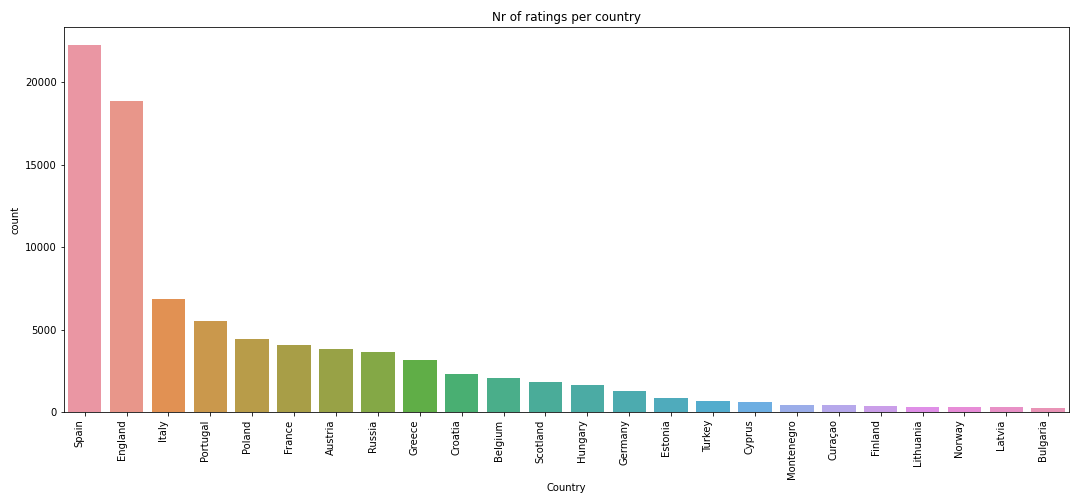

In [11]:
# Most rated countries - ordered ascendingly (count)
plt.figure(figsize=(15,7))
ax = sns.countplot(x='Country', data=ds_one, order=pd.value_counts(ds_one['Country']).iloc[:25].index);
plt.title('Nr of ratings per country')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

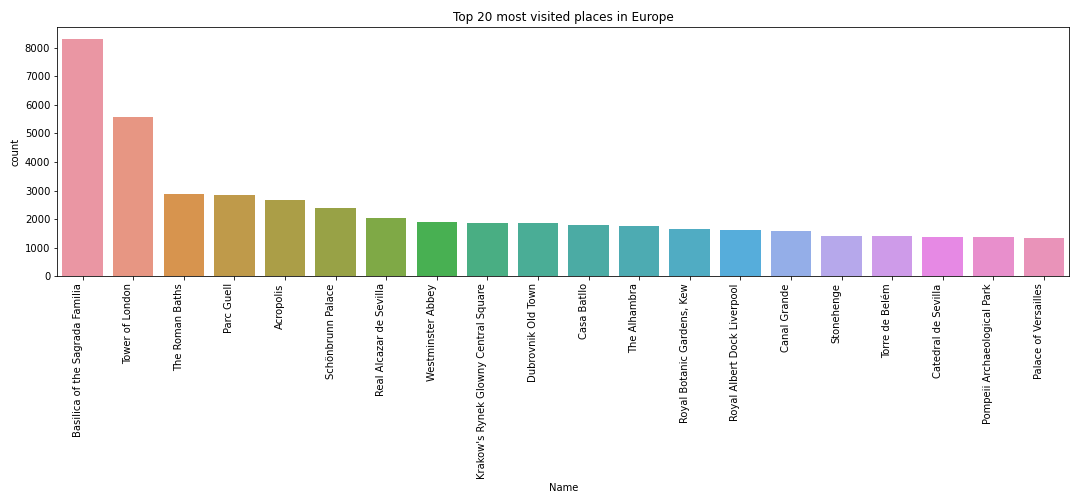

In [12]:
# top 20 visited (reviewed) attractions
plt.figure(figsize=(15,7))
ax = sns.countplot(x='Name', data=ds_one, order=pd.value_counts(ds_one['Name']).iloc[:20].index);
plt.title('Top 20 most visited places in Europe')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

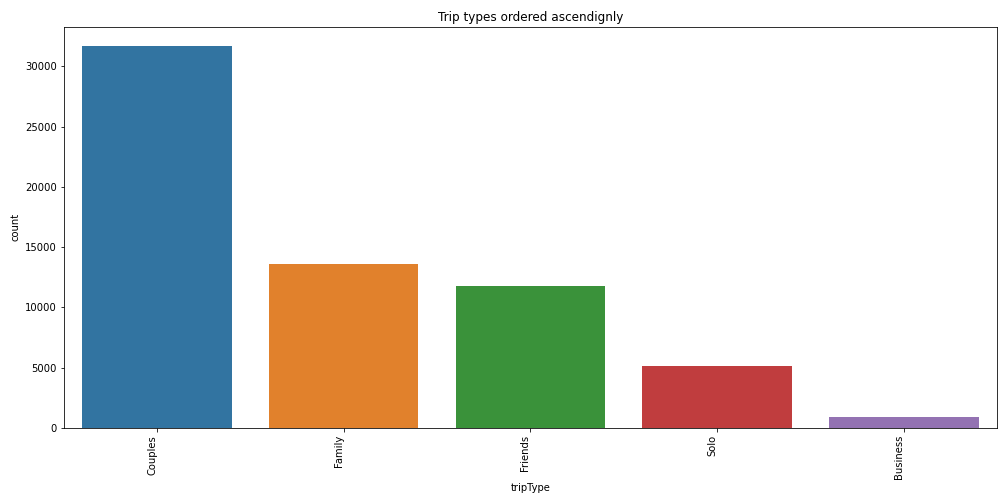

In [13]:
# Draw triptypes across all countries in ascending value
plt.figure(figsize=(14,7))
ax = sns.countplot(x='tripType', data=ds_one, order=pd.value_counts(ds_one['tripType']).iloc[:20].index);
plt.title('Trip types ordered ascendignly')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

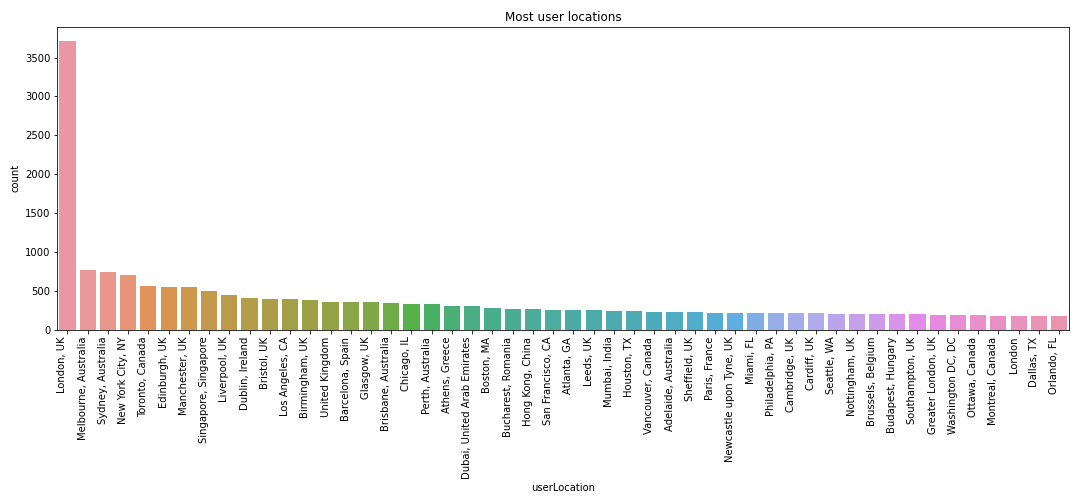

In [14]:
# Top user locations (where users come from based on nr of ratings provided)
plt.figure(figsize=(15,7))
ax = sns.countplot(x='userLocation', data=ds_one, order=pd.value_counts(ds_one['userLocation']).iloc[:50].index);
plt.title('Most user locations')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

# London wins by far, yet we can see that userlocation is so broken based on hundreds of values. Yet, it can be visible that most from users come from either UK or US or Australia. We will go into that more deeper

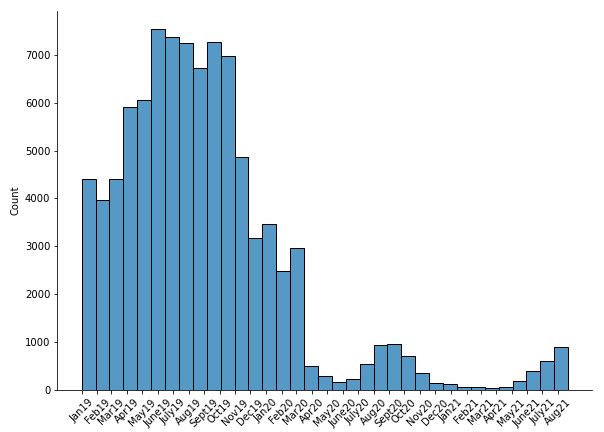

In [15]:
# hist (count)plot on the whole dataset with reviewWritten

sns.displot(data=ds_one, x='reviewWritten', kind='hist', height=6, aspect=1.4, bins=35)

# setting customized ticklabels for x axis
pos = ['2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01',
      '2019-10-01','2019-11-01','2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01'
      ,'2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
      '2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01']
  
lab = ['Jan19',
      'Feb19', 'Mar19', 'Apr19', 'May19', 'June19', 
       'July19', 'Aug19', 'Sept19', 'Oct19', 'Nov19', 'Dec19','Jan20','Feb20', 'Mar20', 'Apr20', 'May20', 'June20', 
       'July20', 'Aug20', 'Sept20', 'Oct20', 'Nov20', 'Dec20','Jan21','Feb21', 'Mar21', 'Apr21', 'May21', 'June21', 
       'July21', 'Aug21']

plt.xticks( pos, lab)
plt.xticks(rotation=45)
plt.show()

# There is a huge drop after Feb2020, meaning Covid has probably hit hard visitance of attractions across all places.
# We explore that further only for Portugal and its closest countrioes (Spain, France, italy) through density plot (below)

(array([17440., 17563., 17591., 17622., 17652., 17683., 17713., 17744.,
        17775., 17805., 17836., 17866., 17897., 17928., 17956., 17987.,
        18017., 18048., 18078., 18109., 18140., 18170., 18201., 18231.,
        18262., 18293., 18322., 18353., 18383., 18414., 18444., 18475.,
        18506., 18536., 18567., 18597., 18628., 18659., 18687., 18718.,
        18748., 18779., 18809., 18840.]),
 [Text(17440.0, 0, 'Oct17'),
  Text(17563.0, 0, 'Feb18'),
  Text(17591.0, 0, 'Mar18'),
  Text(17622.0, 0, 'Apr18'),
  Text(17652.0, 0, 'May18'),
  Text(17683.0, 0, 'June18'),
  Text(17713.0, 0, 'July18'),
  Text(17744.0, 0, 'Aug18'),
  Text(17775.0, 0, 'Sept18'),
  Text(17805.0, 0, 'Oct18'),
  Text(17836.0, 0, 'Nov18'),
  Text(17866.0, 0, 'Dec18'),
  Text(17897.0, 0, 'Jan19'),
  Text(17928.0, 0, 'Feb19'),
  Text(17956.0, 0, 'Mar19'),
  Text(17987.0, 0, 'Apr19'),
  Text(18017.0, 0, 'May19'),
  Text(18048.0, 0, 'June19'),
  Text(18078.0, 0, 'July19'),
  Text(18109.0, 0, 'Aug19'),
  Text(18140.

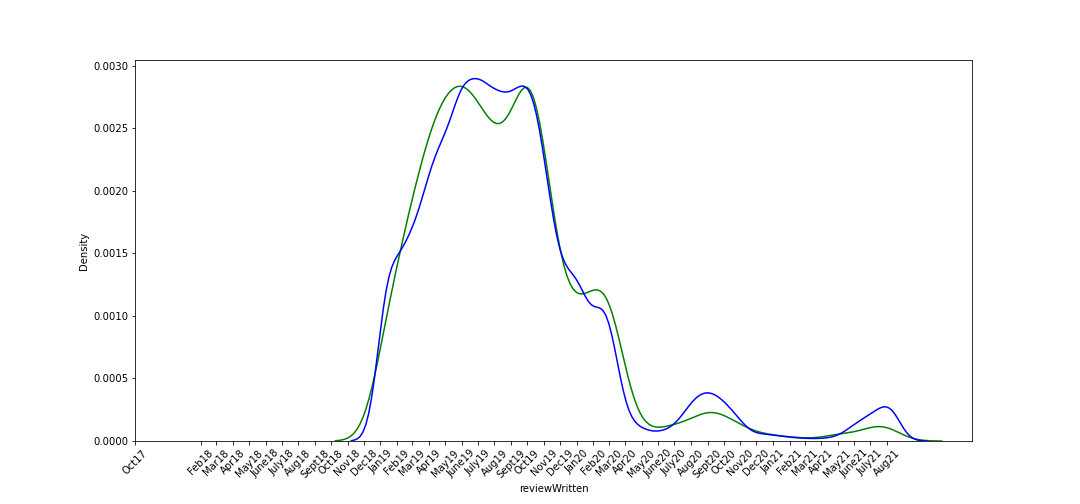

In [16]:
# DENSITY PLOT (Kernel Density Estimate) Portugal vs Rest of countries

fig, ax = plt.subplots(figsize=(15,7))

# sns.kdeplot(portugal_two[portugal_two['Updated_location']=='United States']['reviewVisited'], shade=False, color='yellow', x='reviewVisited')
# sns.kdeplot(portugal_two[portugal_two['Updated_location']=='United Kingdom']['reviewVisited'], shade=False, color='red', x='reviewVisited')
sns.kdeplot(ds_one[ds_one['Country']=='Portugal']['reviewWritten'], shade=False, color='green', x='reviewVisited')
sns.kdeplot(ds_one[ds_one['Country']!='Portugal']['reviewWritten'], shade=False, color='blue',x='reviewVisited')

pos = [ '2017-10-01', '2018-02-01', '2018-03-01', '2018-04-01', 
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
      '2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01',
      '2019-10-01','2019-11-01','2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01'
      ,'2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
      '2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01']
  
lab = [ 'Oct17', 'Feb18', 'Mar18', 'Apr18', 'May18', 'June18', 
       'July18', 'Aug18', 'Sept18', 'Oct18', 'Nov18', 'Dec18', 'Jan19',
      'Feb19', 'Mar19', 'Apr19', 'May19', 'June19', 
       'July19', 'Aug19', 'Sept19', 'Oct19', 'Nov19', 'Dec19','Jan20','Feb20', 'Mar20', 'Apr20', 'May20', 'June20', 
       'July20', 'Aug20', 'Sept20', 'Oct20', 'Nov20', 'Dec20','Jan21','Feb21', 'Mar21', 'Apr21', 'May21', 'June21', 
       'July21', 'Aug21']
  
plt.xticks( pos, lab)
plt.xticks(rotation=45)

# Easy to notice, both Portugal and rest of countries have had the same drop of ratings - meaning COVID has impacted probably all countries strongly


In [17]:
# nr of unique users (user names) in the dataset
ds_one['userName'].nunique()

# from more than 90K records, it is clear that we have some users that have visited more than one of presented 100 attractions

65785

These are the first observations from the exploration part. Yet, it is very important to say that these are very general and some of them confirmed our assumptions (like Covid has had a huge impact on all countries), but also some new like couples triptype has been by far the most popular type of vacation. 

After dataset's verification of quality and construction the data according our needs (for further analyses), we will present many more insights in regards to Portugal but also other, mostly neighbouring countries. Meaning, another "exploration" part (after data construction) will be unveiled. 

## Data verification of quality

In [18]:
# Check of unique localIDs (resulting from describe report earlier)
# found 2 - genis and u which belong to MAG005 and MAG005 and so they will be transformed as such in Data preparation phase

ds_one.localID.unique()


array(['MAG001', 'MAG002', 'MAG003', 'MAG004', 'genis', 'u', 'MAG007',
       'MAG008', 'MAG009', 'MAG010', 'MAG011', 'MAG012', 'MAG013',
       'MAG014', 'MAG015', 'MAG016', 'MAG017', 'MAG018', 'MAG019',
       'MAG020', 'MAG021', 'MAG022', 'MAG023', 'MAG024', 'MAG025',
       'MAG026', 'MAG027', 'MAG028', 'MAG029', 'MAG030', 'MAG031',
       'MAG032', 'MAG033', 'MAG034', 'MAG035', 'MAG036', 'MAG037',
       'MAG038', 'MAG039', 'MAG040', 'MAG041', 'MAG042', 'MAG043',
       'MAG044', 'MAG045', 'MAG046', 'MAG047', 'MAG048', 'MAG049',
       'MAG050', 'MAG051', 'MAG052', 'MAG053', 'MAG054', 'MAG055',
       'MAG056', 'MAG057', 'MAG058', 'MAG059', 'MAG060', 'MAG061',
       'MAG062', 'MAG063', 'MAG064', 'MAG065', 'MAG066', 'MAG067',
       'MAG068', 'MAG069', 'MAG070', 'MAG071', 'MAG072', 'MAG073',
       'MAG074', 'MAG075', 'MAG076', 'MAG077', 'MAG078', 'MAG079',
       'MAG080', 'MAG081', 'MAG082', 'MAG083', 'MAG084', 'MAG085',
       'MAG086', 'MAG087', 'MAG088', 'MAG089', 'MAG090', '

In [19]:
# checked missing values
ds_one.isnull().sum()


# Many missing values on triptypes and user location but we most likely keep all such observations (for some analyses they may be useful, and for those including such variables, they would be automatically excluded)
# At the moment, the ones from Name, country, ISO - dont really matter as another merge will need to be made

localID                  0
extractionDate           0
globalRating             0
positionOnRanking        0
sitesOnRanking           0
totalReviews             0
userName                20
userLocation         13468
userContributions        0
tripType             29068
reviewWritten            0
reviewVisited          710
reviewRating             0
reviewLanguage           0
reviewFullText           0
Name                  5560
Country               5560
ISO                   5560
dtype: int64

In [20]:
# Finding duplicates now
ds_one.duplicated().sum()

# not duplicated rows, but lets check if same user name was not giving rating to same place twice

0

In [21]:
ds_one[ds_one[['Name', 'userName', 'userLocation']].duplicated() == True]

# looks like as those, almost 7,5K rows are like that. In the data preparation phase, we only keep last records

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
209,MAG001,2021-08-20 08:26:28.691,4.5,1,1186,163828,michael.t@michaeltast,"Kolkata (Calcutta), India",19,NaN,2020-03-15,2020-03-01,5,en,"From outside it´s already amazing, but from in...",Basilica of the Sagrada Familia,Spain,ES
213,MAG001,2021-08-20 08:26:34.067,4.5,1,1186,163828,MerylStrepp@MerylStrepp,"Henley-on-Thames, UK",57,NaN,2020-03-14,2020-02-01,5,en,This is not to be missed. Its a wonder of the ...,Basilica of the Sagrada Familia,Spain,ES
270,MAG001,2021-08-20 08:27:02.989,4.5,1,1186,163828,insertname@jadedbear,"Singapore, Singapore",10,Family,2020-03-09,2020-03-01,5,en,Sagrada Familia was just magical and phenomena...,Basilica of the Sagrada Familia,Spain,ES
271,MAG001,2021-08-20 08:27:03.020,4.5,1,1186,163828,James V@jamesv841,"Odessa, TX",4,NaN,2020-03-09,2020-03-01,5,en,"Went with Olga C, our tour was fantastic, so m...",Basilica of the Sagrada Familia,Spain,ES
272,MAG001,2021-08-20 08:27:03.035,4.5,1,1186,163828,Ashleigh1505@Ashleigh1505,"Essex, UK",48,Couples,2020-03-09,2020-02-01,5,en,What a beautiful building. You honestly must s...,Basilica of the Sagrada Familia,Spain,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91994,MAG098,2021-08-21 16:25:49.098,4.5,1,58,5327,Globetrotter008@Globetrotter008,United Kingdom,1135,Couples,2019-06-07,2019-05-01,5,en,"The magnificent Muralla, spanning the entirety...",The Walls of Avila,Spain,ES
91995,MAG098,2021-08-21 16:25:49.223,4.5,1,58,5327,Linda R@I1275STlindar,"Brighton, UK",9,Friends,2019-06-05,2019-06-01,5,en,The history of the wall in Avila is fascinatin...,The Walls of Avila,Spain,ES
91996,MAG098,2021-08-21 16:25:49.360,4.5,1,58,5327,Juanchoborda@Juanchoborda,"Tampa, FL",109,Couples,2019-05-31,2019-05-01,4,en,We paid the 5€ per person and got the audio gu...,The Walls of Avila,Spain,ES
91997,MAG098,2021-08-21 16:25:49.558,4.5,1,58,5327,FlyingMike@mikevE9651PM,NaN,32,Friends,2019-05-27,2019-05-01,4,en,"We bought our tickets, over 65 you get discoun...",The Walls of Avila,Spain,ES


In [22]:
# check it via random username from the table
ds_one[ds_one["userName"] == 'michael.t@michaeltast']

# we can see that this user has the same user location twice. In fact, we would the only difference is in the extractionDate
# Anyways, we will remove these duplicates in the data preparation part

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
208,MAG001,2021-08-20 08:26:28.676,4.5,1,1186,163828,michael.t@michaeltast,"Kolkata (Calcutta), India",19,NaN,2020-03-15,2020-03-01,5,en,... to buy a ticket to see the Basilica inside...,Basilica of the Sagrada Familia,Spain,ES
209,MAG001,2021-08-20 08:26:28.691,4.5,1,1186,163828,michael.t@michaeltast,"Kolkata (Calcutta), India",19,NaN,2020-03-15,2020-03-01,5,en,"From outside it´s already amazing, but from in...",Basilica of the Sagrada Familia,Spain,ES


# DATA PREPARATION (Select, clean, construct, integrate, format)

## Data selection

In [23]:
# displaying the dataset, that is going to be prepared for the modelling

ds_one.head(5)

# We go with the merged dataset - ds_one (attractions + reviews sheet merged together as up until now)
# We dont see any reasons (due to certain data limitations) to use the holidays dataset. It may be used once or twice ocassioanly, but not that the dataset would be 



,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi...",Basilica of the Sagrada Familia,Spain,ES
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...,Basilica of the Sagrada Familia,Spain,ES
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...,Basilica of the Sagrada Familia,Spain,ES
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...,Basilica of the Sagrada Familia,Spain,ES
4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...,Basilica of the Sagrada Familia,Spain,ES


## Data cleaning

In [24]:
# The quality report unveiled 3 issues in the dataset: LocalID, Duplicated rows and Missing values
# First two we are going to clean/edit inmediately, starting with Local ID

ds_one['localID'] = ds_one['localID'].replace(['u'],'MAG006')
ds_one['localID'] = ds_one['localID'].replace(['genis'],'MAG005')

# However, we this change, we need to perform the merge operation again. TO be seen in the upcoming codes


In [25]:
# Dropping dupplicated columns before another merge
ds_one = ds_one.drop(['Name', 'Country', 'ISO'], axis = 1)
ds_one.head(5)

# now the ds_one pretends to be like a "reviews dataset" from before which we need to merge it with the attractions dataset

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
0,MAG001,2021-08-20 08:24:40.077,4.5,1,1186,163828,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,en,"Absolutely breathtaking use of light, an amazi..."
1,MAG001,2021-08-20 08:24:40.097,4.5,1,1186,163828,nickchamb@nickchamb,"Bandon, Ireland",7,Couples,2021-08-17,2021-03-01,5,en,A really interesting and beautiful place to vi...
2,MAG001,2021-08-20 08:24:40.117,4.5,1,1186,163828,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,en,Beautiful place and must visit place in barcel...
3,MAG001,2021-08-20 08:24:40.147,4.5,1,1186,163828,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,en,A MUST when visiting Barcelkona. It is consta...
4,MAG001,2021-08-20 08:24:40.159,4.5,1,1186,163828,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,en,I visited about 20 years ago and there has bee...


In [26]:
# FINAL Data collection followed by the data description 
ds = ds_one.merge(ds_attractions, on='localID', how='left')

In [27]:
ds.describe(include='all').T

# description shows us improved values like having 100unique names that goes in hand with 100unique LocalIDs

<ipython-input-27-d7ef2f921d27>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds.describe(include='all').T
<ipython-input-27-d7ef2f921d27>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds.describe(include='all').T
<ipython-input-27-d7ef2f921d27>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
localID,92120,100,MAG001,8309,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extractionDate,92120,91896,2021-08-20 09:00:54.185000,2,2021-08-20 08:24:40.077,2021-08-21 16:27:17.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
globalRating,92120.0,NaN,NaN,NaN,NaT,NaT,4.485166,0.178085,4.0,4.5,4.5,4.5,5.0
positionOnRanking,92120.0,NaN,NaN,NaN,NaT,NaT,3.91459,4.843013,1.0,1.0,2.0,6.0,55.0
sitesOnRanking,92120.0,NaN,NaN,NaN,NaT,NaT,748.263537,802.742304,5.0,154.0,484.0,1186.0,3837.0
totalReviews,92120.0,NaN,NaN,NaN,NaT,NaT,40556.601813,42914.381014,5179.0,14152.0,24454.0,51324.0,163828.0
userName,92100,65785,Malgorzata@Margo7850p,31,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,78652,12613,"London, UK",3710,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,92120.0,NaN,NaN,NaN,NaT,NaT,477.52056,7270.518677,0.0,20.0,66.0,215.0,607732.0
tripType,63052,5,Couples,31702,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# erased all duplicates with same values for name, username and userlocation - only keeping the "last" record
ds = ds.drop_duplicates(['Name','userName','userLocation'],keep= 'last')
ds.info()

# now we can see that our dataset has lost more than 7K duplicated rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84649 entries, 0 to 92119
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            84649 non-null  object        
 1   extractionDate     84649 non-null  datetime64[ns]
 2   globalRating       84649 non-null  float64       
 3   positionOnRanking  84649 non-null  int64         
 4   sitesOnRanking     84649 non-null  int64         
 5   totalReviews       84649 non-null  int64         
 6   userName           84647 non-null  object        
 7   userLocation       72283 non-null  object        
 8   userContributions  84649 non-null  int64         
 9   tripType           58017 non-null  object        
 10  reviewWritten      84649 non-null  datetime64[ns]
 11  reviewVisited      84015 non-null  datetime64[ns]
 12  reviewRating       84649 non-null  int64         
 13  reviewLanguage     84649 non-null  object        
 14  review

In [29]:
# check of no more duplicates acrss all potential variables but it looks all good now
ds[ds[['Name', 'userName', 'userLocation','tripType','reviewVisited','tripType','userContributions']].duplicated() == True]


,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO


In [30]:
# crosscheck whether this is correct. We perform it on the same username via which we demonstrated the appearance of duplicates
ds[ds["userName"] == 'michael.t@michaeltast']

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText,Name,Country,ISO
209,MAG001,2021-08-20 08:26:28.691,4.5,1,1186,163828,michael.t@michaeltast,"Kolkata (Calcutta), India",19,NaN,2020-03-15,2020-03-01,5,en,"From outside it´s already amazing, but from in...",Basilica of the Sagrada Familia,Spain,ES


As previously stated, we are not going to do anything with the missing values yet, since they appear not to be harmful 

## Data Construct

In [31]:
# Starting with the change the order --> of 3 merged columns to be placed at the begining after localID)
# + Getting rid of meaningless or duplicated columns (ISO, extractionDate, position on ranking, reviewlanguage, sitesonranking, TotalReviews)
ds = ds.loc[:, ["localID","Name","Country","globalRating","userName","userLocation","userContributions","tripType","reviewWritten","reviewVisited","reviewRating","reviewFullText"]]

# https://towardsdatascience.com/4-methods-for-changing-the-column-order-of-a-pandas-data-frame-a16cf0b58943



In [32]:
ds.describe(include='all').T


<ipython-input-32-a115dfb18997>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds.describe(include='all').T
<ipython-input-32-a115dfb18997>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ds.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
localID,84649,100,MAG001,7883,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,84649,100,Basilica of the Sagrada Familia,7883,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,84649,25,Spain,20613,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
globalRating,84649.0,NaN,NaN,NaN,NaT,NaT,4.484642,0.178813,4.0,4.5,4.5,4.5,5.0
userName,84647,65785,Malgorzata@Margo7850p,28,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userLocation,72283,12613,"London, UK",3396,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
userContributions,84649.0,NaN,NaN,NaN,NaT,NaT,450.172607,6279.42063,0.0,20.0,66.0,214.0,607732.0
tripType,58017,5,Couples,29214,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewWritten,84649,934,2019-10-09 00:00:00,450,2019-01-01,2021-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviewVisited,84015,57,2019-09-01 00:00:00,7933,2015-10-01,2021-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


General observations:

- 100 attractions visitied and kept in the data set from 25 countries
- Spain is te most visited and rated country, with Sagrada being the nr 1 attraction
- 3/4 of reviews are written are by people who have only rated once (1 location only)
- there are 12670 different user unique locations - Our team anticipates that it may be very hard to analyze this variable
- Out of the 2/3 of reviews written with certain trip type, couples are recorded in every second ocassion
- The month with the highest record of visitance and revie written in this date set is september 2019 (before covid)

Other:
- user contributions seem to have an outlier (looking at the Max value) - still will see if we will work with this variable

We are adding new columns, more specifically:
- Covid_time = after / before (based on the data already, but also overall start of the covid spread across Europe we set that everything before March2020 is the time before and everythig after --> after covid
- visits_together = each row with corresponding country will be assigned total number of visits per country (may be useful later in out analyses and comparison of Portugal to other countries
- Day of the week at which the review at certain attraction was given
- user visits for specific countries (explained in the report + to be understood from blocks of code later)

We also considered
- AVG time between attraction visit and review written but as one variable is with month and another with days, it would not be that accurate


In [33]:
# Adding new column whether review visitied was before or after covid
ds.loc[ds['reviewVisited'] >= '2020-03-01', 'Covid_time'] = 'After Covid'
ds.loc[ds['reviewVisited'] < '2020-03-01', 'Covid_time'] = 'Before Covid'

In [34]:
# Adding new column with total visits per each country 
ds['visits_together_per_country'] = ds['Country'].map(ds['Country'].value_counts())
ds.head(5)

# https://stackoverflow.com/questions/17709270/create-column-of-value-counts-in-pandas-dataframe

,localID,Name,Country,globalRating,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewFullText,Covid_time,visits_together_per_country
0,MAG001,Basilica of the Sagrada Familia,Spain,4.5,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,"Absolutely breathtaking use of light, an amazi...",After Covid,20613
2,MAG001,Basilica of the Sagrada Familia,Spain,4.5,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,Beautiful place and must visit place in barcel...,After Covid,20613
3,MAG001,Basilica of the Sagrada Familia,Spain,4.5,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,A MUST when visiting Barcelkona. It is consta...,After Covid,20613
4,MAG001,Basilica of the Sagrada Familia,Spain,4.5,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,I visited about 20 years ago and there has bee...,After Covid,20613
5,MAG001,Basilica of the Sagrada Familia,Spain,4.5,paul n@pauln3630,"Towaco, NJ",21,NaN,2021-08-15,2021-08-01,3,The sheer height of this church makes it a onc...,After Covid,20613


In [35]:
# day of the week - review given
ds['day_of_week_review_given'] = ds['reviewWritten'].dt.day_name()
ds.head()

,localID,Name,Country,globalRating,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewFullText,Covid_time,visits_together_per_country,day_of_week_review_given
0,MAG001,Basilica of the Sagrada Familia,Spain,4.5,Maurice M@MauriceM171,"Indianapolis, IN",29,Couples,2021-08-18,2021-08-01,5,"Absolutely breathtaking use of light, an amazi...",After Covid,20613,Wednesday
2,MAG001,Basilica of the Sagrada Familia,Spain,4.5,Arthur Villon@arthur4588,"Valencia, Spain",268,Friends,2021-08-16,2021-08-01,5,Beautiful place and must visit place in barcel...,After Covid,20613,Monday
3,MAG001,Basilica of the Sagrada Familia,Spain,4.5,James U@696jamesu,NaN,7,NaN,2021-08-16,2021-07-01,5,A MUST when visiting Barcelkona. It is consta...,After Covid,20613,Monday
4,MAG001,Basilica of the Sagrada Familia,Spain,4.5,Kamal K Sirra@Sirra63,"Madrid, Spain",516,Family,2021-08-15,2021-07-01,4,I visited about 20 years ago and there has bee...,After Covid,20613,Sunday
5,MAG001,Basilica of the Sagrada Familia,Spain,4.5,paul n@pauln3630,"Towaco, NJ",21,NaN,2021-08-15,2021-08-01,3,The sheer height of this church makes it a onc...,After Covid,20613,Sunday


We also create separate dataset for:
- Portugal
- Spain
- Italy
- France
- Portugal + Italy + Spain + France as all these countries have high representation of records (more than 4000 each) and are most visited countries in Europe (source: https://www.schengenvisainfo.com/travel-guide/top-10-most-visited-european-countries/) - Portugal can be inspired and have the highest benchmark. Also culturally, these countries are the most similar ones. 

In [36]:
# creation of mentioned dataset
Portugal = ds.apply(lambda row: row[ds['Country'].isin(['Portugal'])])
italy = ds.apply(lambda row: row[ds['Country'].isin(['Italy'])])
spain = ds.apply(lambda row: row[ds['Country'].isin(['Spain'])])
france = ds.apply(lambda row: row[ds['Country'].isin(['France'])])

pr_it_es_fr = ds.apply(lambda row: row[ds['Country'].isin(['Portugal','France','Italy','Spain'])])

In [37]:
# dropping duplicates on username and user location (this one is not used in the analysis though)
Portugal_unique_visits = Portugal.drop_duplicates(['userName','userLocation'],keep= 'last')
italy_unique_visits = italy.drop_duplicates(['userName','userLocation'],keep= 'last')
spain_unique_visits = spain.drop_duplicates(['userName','userLocation'],keep= 'last')
france_unique_visits = france.drop_duplicates(['userName','userLocation'],keep= 'last')

In [38]:
# adding user visits for all countries into separate columns
Portugal['user_visits_sum'] = Portugal['userName'].map(Portugal['userName'].value_counts())
italy['user_visits_sum'] = italy['userName'].map(italy['userName'].value_counts())
spain['user_visits_sum'] = spain['userName'].map(spain['userName'].value_counts())
france['user_visits_sum'] = france['userName'].map(france['userName'].value_counts())

In [39]:
# merging dataset together
pr_it_es_fr_visits = [Portugal, italy, spain, france]
pr_it_es_fr_visits_final = pd.concat(pr_it_es_fr_visits)
pr_it_es_fr_visits_final

# https://towardsdatascience.com/joining-datasets-with-pythons-pandas-ed832f01450c

,localID,Name,Country,globalRating,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewFullText,Covid_time,visits_together_per_country,day_of_week_review_given,user_visits_sum
29827,MAG010,Torre de Belém,Portugal,4.0,Barbs25@Barbs25,"Staffordshire, UK",2273,Friends,2021-08-11,2021-07-01,3,Not blown away by it but nice enough to look a...,After Covid,5259,Wednesday,4
29828,MAG010,Torre de Belém,Portugal,4.0,WWH47@WWH47,"Baton Rouge, LA",121,NaN,2021-08-02,2021-07-01,5,Well worth the visit in the Belem portion of t...,After Covid,5259,Monday,2
29829,MAG010,Torre de Belém,Portugal,4.0,Runawayblond@runawayblond,"Chicago, IL",217,Solo,2021-07-26,2021-06-01,4,Really cool! Sadly it was closed to explore be...,After Covid,5259,Monday,1
29830,MAG010,Torre de Belém,Portugal,4.0,Darren H@DarrenHumphrey,"Orlando, FL",298,NaN,2021-07-24,2021-06-01,5,What visit to Lisbon is complete without at le...,After Covid,5259,Saturday,2
29831,MAG010,Torre de Belém,Portugal,4.0,Kevin S@kevins684,"Pontypridd, UK",4550,NaN,2021-07-23,2021-07-01,4,"A 16th century tower, ornately built so seemin...",After Covid,5259,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92064,MAG099,Place Stanislas,France,5.0,paul_w@paul_abcd_nl,"Holten, The Netherlands",129,Business,2019-03-03,2019-03-01,5,Nancy is a very nice city. Lot of restaurants...,Before Covid,3717,Sunday,1
92065,MAG099,Place Stanislas,France,5.0,Aida H@45aidah,"Bamberg, Germany",31,Family,2019-02-13,2019-02-01,5,Absolutely the most beautiful place so far I v...,Before Covid,3717,Wednesday,1
92066,MAG099,Place Stanislas,France,5.0,Neil L@neill519,"Son en Breugel, The Netherlands",62,Friends,2019-02-10,2019-02-01,5,The square was excellent and was even better a...,Before Covid,3717,Sunday,1
92067,MAG099,Place Stanislas,France,5.0,Thomas Ozbun@thomasozbun,"Vicenza, Italy",982,Couples,2019-02-01,2018-03-01,5,the main attraction of the city: Place Stanisl...,Before Covid,3717,Friday,4


We believe that user location is a key variable to unveils some patters on portuguese visitors, yet as demonstrated earlier, there are so many unique values. Yet, for the portuguese dataset, we try to apply string contain method that could possibly group together majority of user location under common umbrella (like England, Scotland, UK --> all belong to UK). In many ocassions, there is a city and then the country stated (especially US), so we try to apply the method to have statisically significant data from updated user location that we can work with. 



In [40]:
# For the mentioned experiment with the updated user location we will make a copy of a current Portuguese dataset
portugal_two = Portugal.copy()
portugal_two.isnull().sum()

# so we expect 641 records to have "missing location" string value under new column "updated_location"

localID                           0
Name                              0
Country                           0
globalRating                      0
userName                          0
userLocation                    641
userContributions                 0
tripType                       1656
reviewWritten                     0
reviewVisited                     2
reviewRating                      0
reviewFullText                    0
Covid_time                        2
visits_together_per_country       0
day_of_week_review_given          0
user_visits_sum                   0
dtype: int64

In [41]:
portugal_two['userLocation'] = portugal_two['userLocation'].fillna('Missing location - NaN')

# first we fill those missing values with "Missing location - NaN" string --> enabling us to these records write under updated location too

In [42]:
# Creating new column on Portuguese dataset grouped updated location respectively. Those observations that do not match current value we expect to have "missing values"

portugal_two.loc[portugal_two['userLocation'].str.contains("UK|Ireland|United Kingdom|England"), 'Updated_location'] = 'United Kingdom'
portugal_two.loc[portugal_two['userLocation'].str.contains("US|United States|CA|ALA|AK|AS|AZ|AR|CA|CO|CT|DE|DC|FL|GA|HU|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|MP|OH|OK|OR|PA|PR|RI|SC|SD|TN|TX|UM|UT|VT|VI|WA|VA|WV|WI|WY"), 'Updated_location'] = 'United States'
portugal_two.loc[portugal_two['userLocation'].str.contains("Portugal|portugal"), 'Updated_location'] = 'Portugal'
portugal_two.loc[portugal_two['userLocation'].str.contains("Canada|canada"), 'Updated_location'] = 'Canada'
portugal_two.loc[portugal_two['userLocation'].str.contains("Australia|New Zealand"), 'Updated_location'] = 'Australia/New Zealand'
portugal_two.loc[portugal_two['userLocation'].str.contains("Germany"), 'Updated_location'] = 'Germany'
portugal_two.loc[portugal_two['userLocation'].str.contains("Italy"), 'Updated_location'] = 'Italy'
portugal_two.loc[portugal_two['userLocation'].str.contains("Spain"), 'Updated_location'] = 'Spain'

portugal_two.loc[portugal_two['userLocation'].str.contains("Missing location - NaN"), 'Updated_location'] = 'Missing location - NaN'


# https://stackoverflow.com/questions/36653419/str-contains-to-create-new-column-in-pandas-dataframe
# https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas


In [43]:
portugal_two.isnull().sum()
# we have 1290 locations that have not been matched - so we will assign them a "different country" value

localID                           0
Name                              0
Country                           0
globalRating                      0
userName                          0
userLocation                      0
userContributions                 0
tripType                       1656
reviewWritten                     0
reviewVisited                     2
reviewRating                      0
reviewFullText                    0
Covid_time                        2
visits_together_per_country       0
day_of_week_review_given          0
user_visits_sum                   0
Updated_location               1290
dtype: int64

In [44]:
portugal_two['Updated_location'] = portugal_two['Updated_location'].fillna('Different country')
portugal_two.isnull().sum()

# Again, triptyp missing values do not mind as 2/3 of the rows can be satisfactory when analysing triptypes separately

localID                           0
Name                              0
Country                           0
globalRating                      0
userName                          0
userLocation                      0
userContributions                 0
tripType                       1656
reviewWritten                     0
reviewVisited                     2
reviewRating                      0
reviewFullText                    0
Covid_time                        2
visits_together_per_country       0
day_of_week_review_given          0
user_visits_sum                   0
Updated_location                  0
dtype: int64

## Data Integration

No need to integrate any other data. We are good here.

## Data Format

Same as with Data integration, no formatting is needed for the analyses.

In [45]:
portugal_two

,localID,Name,Country,globalRating,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewFullText,Covid_time,visits_together_per_country,day_of_week_review_given,user_visits_sum,Updated_location
29827,MAG010,Torre de Belém,Portugal,4.0,Barbs25@Barbs25,"Staffordshire, UK",2273,Friends,2021-08-11,2021-07-01,3,Not blown away by it but nice enough to look a...,After Covid,5259,Wednesday,4,United Kingdom
29828,MAG010,Torre de Belém,Portugal,4.0,WWH47@WWH47,"Baton Rouge, LA",121,NaN,2021-08-02,2021-07-01,5,Well worth the visit in the Belem portion of t...,After Covid,5259,Monday,2,United States
29829,MAG010,Torre de Belém,Portugal,4.0,Runawayblond@runawayblond,"Chicago, IL",217,Solo,2021-07-26,2021-06-01,4,Really cool! Sadly it was closed to explore be...,After Covid,5259,Monday,1,United States
29830,MAG010,Torre de Belém,Portugal,4.0,Darren H@DarrenHumphrey,"Orlando, FL",298,NaN,2021-07-24,2021-06-01,5,What visit to Lisbon is complete without at le...,After Covid,5259,Saturday,2,United States
29831,MAG010,Torre de Belém,Portugal,4.0,Kevin S@kevins684,"Pontypridd, UK",4550,NaN,2021-07-23,2021-07-01,4,"A 16th century tower, ornately built so seemin...",After Covid,5259,Friday,4,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91034,MAG093,Bom Jesus do Monte,Portugal,4.5,JAFL@Joao-Jafl,"Braga, Portugal",17,Solo,2019-02-12,2019-01-01,5,Excelente place for walk or running with amazi...,Before Covid,5259,Tuesday,1,Portugal
91035,MAG093,Bom Jesus do Monte,Portugal,4.5,Loveitta@Loveitta,"Manchester, UK",24,Solo,2019-01-17,2019-01-01,5,I'm so happy that i visited this amazing churc...,Before Covid,5259,Thursday,1,United Kingdom
91036,MAG093,Bom Jesus do Monte,Portugal,4.5,Kaytd60@Kaytd60,"Adelaide, Australia",33,NaN,2019-01-15,2018-09-01,5,We took the local bus up to Bom Jesus do Monte...,Before Covid,5259,Tuesday,1,Australia/New Zealand
91037,MAG093,Bom Jesus do Monte,Portugal,4.5,BlueSkyTravell@BlueSkyTravell,"Obertshausen, Germany",18,Family,2019-01-03,2019-01-01,5,Great place and fantastic views.If you come wi...,Before Covid,5259,Thursday,1,Germany


## DATA EXPLORATION PART 2 (to obtain insights from Portugal)

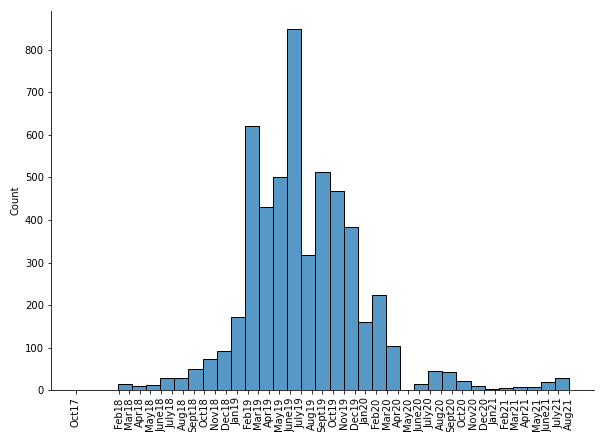

In [46]:
# Histogram of Portugal 
# plt.figure(figsize=(15,7))
ax = sns.displot(data=portugal_two, x='reviewVisited', kind='hist', height=6, aspect=1.4, bins=35)


# setting customized ticklabels for x axis
pos = [ '2017-10-01', '2018-02-01', '2018-03-01', '2018-04-01', 
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
      '2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01',
      '2019-10-01','2019-11-01','2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01'
      ,'2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
      '2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01']
  
lab = [ 'Oct17', 'Feb18', 'Mar18', 'Apr18', 'May18', 'June18', 
       'July18', 'Aug18', 'Sept18', 'Oct18', 'Nov18', 'Dec18', 'Jan19',
      'Feb19', 'Mar19', 'Apr19', 'May19', 'June19', 
       'July19', 'Aug19', 'Sept19', 'Oct19', 'Nov19', 'Dec19','Jan20','Feb20', 'Mar20', 'Apr20', 'May20', 'June20', 
       'July20', 'Aug20', 'Sept20', 'Oct20', 'Nov20', 'Dec20','Jan21','Feb21', 'Mar21', 'Apr21', 'May21', 'June21', 
       'July21', 'Aug21']
  
plt.xticks( pos, lab)
plt.xticks(rotation=90)
plt.show()


# Clearly seen a huuge drop after March 2020 to almost zero.
# Drop after july can explain long term vacations (more than one months form which many may be assigned to July - same happened in Spain and can be observed via density plots below)
# lineplot - to explore what has happened between 
# https://seaborn.pydata.org/generated/seaborn.lineplot.html perhaps based on pivot table

<AxesSubplot:xlabel='reviewVisited', ylabel='Density'>

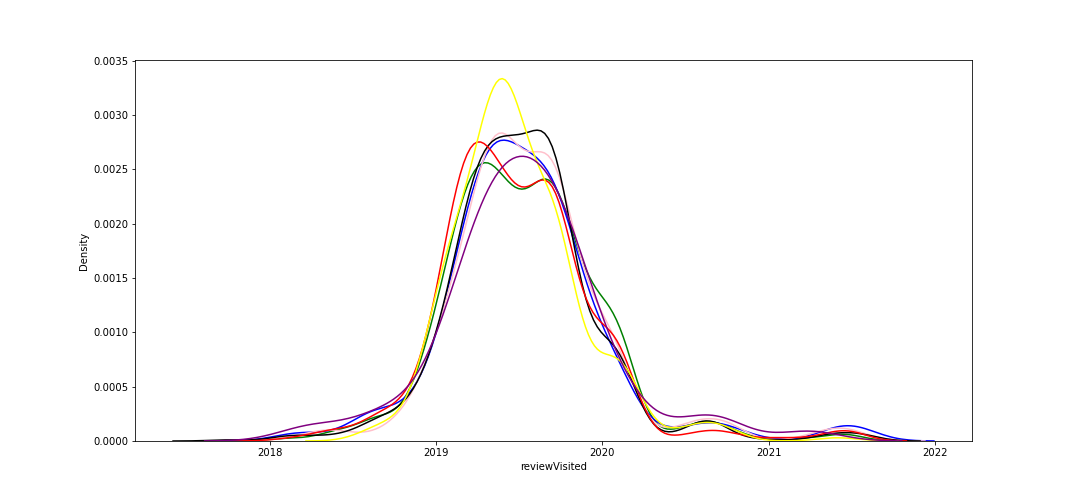

In [47]:
fig, ax = plt.subplots(figsize=(15,7))

sns.kdeplot(portugal_two[portugal_two['Name']=='Torre de Belém']['reviewVisited'], shade=False, color='green', x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Name']=='Quinta da Regaleira']['reviewVisited'], shade=False, color='blue',x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Name']=='Ponte de Dom Luís I']['reviewVisited'], shade=False, color='pink',x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Name']=='Park and National Palace of Pena']['reviewVisited'], shade=False, color='black',x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Name']=='Mosteiro dos Jeronimos']['reviewVisited'], shade=False, color='red',x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Name']=='Cais da Ribeira']['reviewVisited'], shade=False, color='yellow',x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Name']=='Bom Jesus do Monte']['reviewVisited'], shade=False, color='purple',x='reviewVisited')


# Allmost every attracrtion had same distribution relative to their own count of ratings across the time (outstanding is just cais de ribeira - timeout market)



<AxesSubplot:xlabel='reviewVisited', ylabel='Density'>

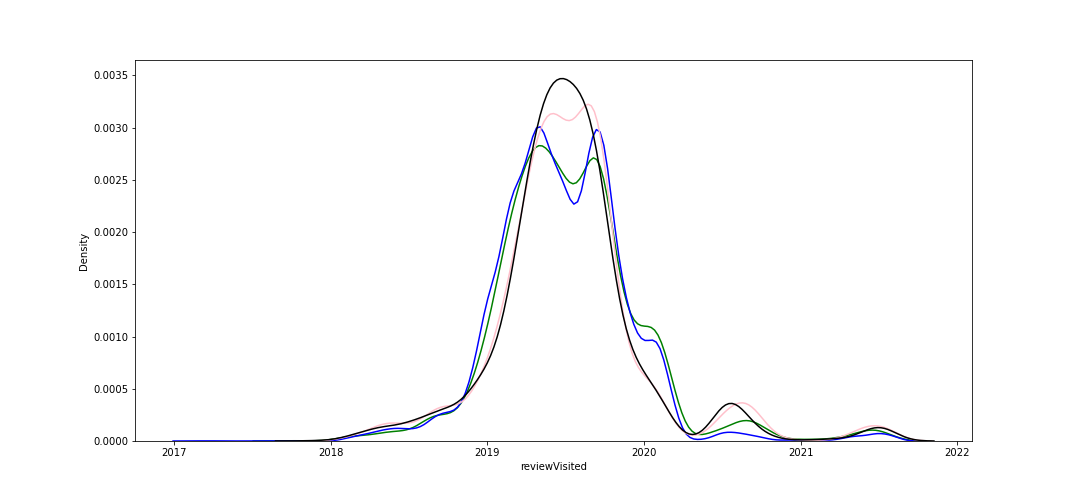

In [48]:
# DENSITY PLOT (Kernel Density Estimate) Portugal vs its main competitors (spain, italy, france)

fig, ax = plt.subplots(figsize=(15,7))

# fig, ax = plt.subplots(figsize=(15,7))

sns.kdeplot(pr_it_es_fr[pr_it_es_fr['Country']=='Portugal']['reviewVisited'], shade=False, color='green', x='reviewVisited')
sns.kdeplot(pr_it_es_fr[pr_it_es_fr['Country']=='Spain']['reviewVisited'], shade=False, color='blue',x='reviewVisited')
sns.kdeplot(pr_it_es_fr[pr_it_es_fr['Country']=='Italy']['reviewVisited'], shade=False, color='pink',x='reviewVisited')
sns.kdeplot(pr_it_es_fr[pr_it_es_fr['Country']=='France']['reviewVisited'], shade=False, color='black',x='reviewVisited')

# even though there may be a small drops in case of Portugal and Spain, the trendline is almost the same for each country, meaning each of the countries have been hit almost the same by Covid19 and it is brutally seen through histograms and density plots presented

### DATA EXPLORATION - INSIGHT 1 (PRT vs other countries - covid impact on increase of ratings (visitance))

In [49]:
# AVG rating before and after covid in Portugal
pt_crosstab_ratings = pd.crosstab(index=portugal_two['Name'],
            columns=portugal_two['Covid_time'],
            values=portugal_two['reviewRating'],
            aggfunc=np.mean)
pt_crosstab_ratings.style.background_gradient(axis=None, low=0.75, high=1.0)


# even some nice differences may be found, bear in mind number of observations after covid and whether they can be statiscally significant

# https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html
# comparing mean of the ratings for each of the attractions before and after covid 

Covid_time,After Covid,Before Covid
Name,,
Bom Jesus do Monte,4.181818,4.770492
Cais da Ribeira,4.666667,4.587413
Mosteiro dos Jeronimos,4.370370,4.444444
Park and National Palace of Pena,4.555556,4.176656
Ponte de Dom Luís I,4.777778,4.695652
Quinta da Regaleira,4.540541,4.804388
Torre de Belém,4.160494,4.229441


In [50]:
# numeric impact on each attraction before and after covid 

pt_crosstab = pd.crosstab(index=portugal_two['Name'],
            columns=portugal_two['Covid_time'],
            values=portugal_two['reviewRating'],
            aggfunc="count")
pt_crosstab.style.background_gradient(axis=None, low=0.75, high=1.0)

Covid_time,After Covid,Before Covid
Name,,
Bom Jesus do Monte,11,122
Cais da Ribeira,18,286
Mosteiro dos Jeronimos,54,1044
Park and National Palace of Pena,54,951
Ponte de Dom Luís I,54,782
Quinta da Regaleira,37,547
Torre de Belém,81,1216


In [51]:
# numeric impact on each attraction before and after - but now os % increase, to see which attractions seem to "suffer" less

pt_crosstab["AC growth after before covid"] = (pt_crosstab["After Covid"] / pt_crosstab["Before Covid"]) * 100
pt_crosstab

Covid_time,After Covid,Before Covid,AC growth after before covid
Name,,,
Bom Jesus do Monte,11,122,9.016393
Cais da Ribeira,18,286,6.293706
Mosteiro dos Jeronimos,54,1044,5.172414
Park and National Palace of Pena,54,951,5.678233
Ponte de Dom Luís I,54,782,6.905371
Quinta da Regaleira,37,547,6.764168
Torre de Belém,81,1216,6.661184


In [52]:
# seeing absolute number of visit before and after covid
pr_es_it_fr_crosstab = pd.crosstab(index=pr_it_es_fr['Country'],
            columns=pr_it_es_fr['Covid_time'],
            values=pr_it_es_fr['reviewRating'],
            aggfunc="count")

pr_es_it_fr_crosstab["AC growth after before covid"] = (pr_es_it_fr_crosstab["After Covid"] / pr_es_it_fr_crosstab["Before Covid"]) * 100
pr_es_it_fr_crosstab

Covid_time,After Covid,Before Covid,AC growth after before covid
Country,,,
France,223,3403,6.553041
Italy,427,5859,7.287933
Portugal,309,4948,6.244947
Spain,698,19752,3.533819


In [53]:
# building DF to display AC growth after before covid

France = (223/3403) * 100
print(France)

Italy = (427/5859) * 100
print(Italy)

portugal = (309/4948) * 100
print(portugal)

Spain =  698/19752 * 100
print(Spain)

together_increase = [['Italy', 7.287933094384708], ['France', 6.553041434028799], ['portugal', 6.2449474535165725], ['Spain', 3.5338193600648036]]
 
# Create the pandas DataFrame
together_increase_ac = pd.DataFrame(together_increase, columns = ['Country', 'increase after covid (%)'])
 
# print dataframe.

6.553041434028799
7.287933094384708
6.2449474535165725
3.5338193600648036


<ipython-input-54-4761c8be2b4b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


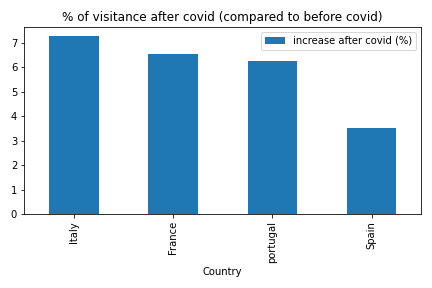

In [54]:
# Bar chart representation of ratings growth after covid

together_increase_ac.plot(kind="bar", x='Country', y='increase after covid (%)');
plt.title('% of visitance after covid (compared to before covid)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

# clearly, Spain has decreased a lot!

### DATA EXPLORATION - INISGHT 2 (proportion of visits in Portugal and Spain is far better than in France, Italy)

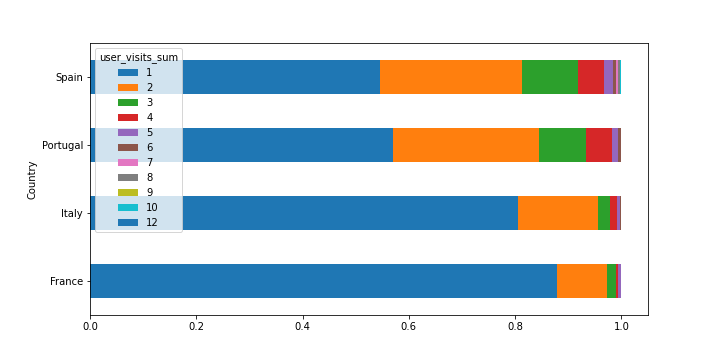

In [55]:
# proportion of visitors based on how many visits hey have made in the given country 

nr_of_visits_crosstab_country = pd.crosstab(pr_it_es_fr_visits_final['Country'],pr_it_es_fr_visits_final['user_visits_sum'],normalize='index')

nr_of_visits_crosstab_country = nr_of_visits_crosstab_country.div(nr_of_visits_crosstab_country.sum(1), axis=0)

# Draw
fig, ax = plt.subplots(figsize=(10,5))
g = nr_of_visits_crosstab_country.plot(kind='barh', stacked=True, ax=ax)





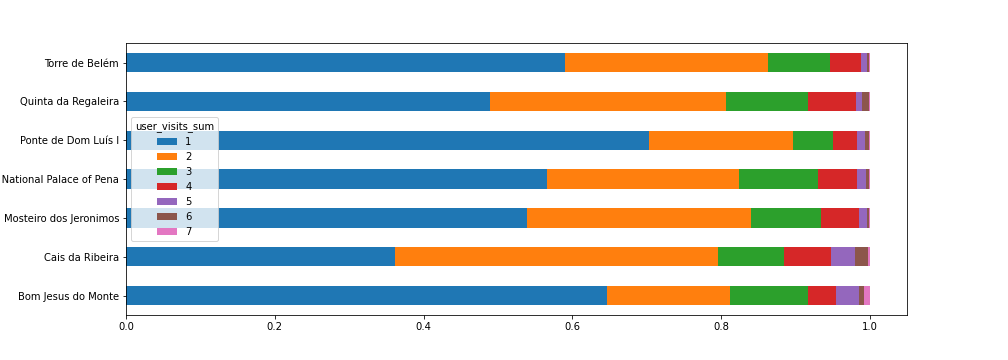

In [56]:
# same just in portugal across attractions 

nr_of_visits_crosstab_pt_attractions = pd.crosstab(Portugal['Name'],Portugal['user_visits_sum'],normalize='index')

nr_of_visits_crosstab_pt_attractions = nr_of_visits_crosstab_pt_attractions.div(nr_of_visits_crosstab_pt_attractions.sum(1), axis=0)

# Draw
fig, ax = plt.subplots(figsize=(14,5))
g = nr_of_visits_crosstab_pt_attractions.plot(kind='barh', stacked=True, ax=ax)



### DATA EXPLORATION - INISGHT 3 (Couples being by far the most popular triptypes)

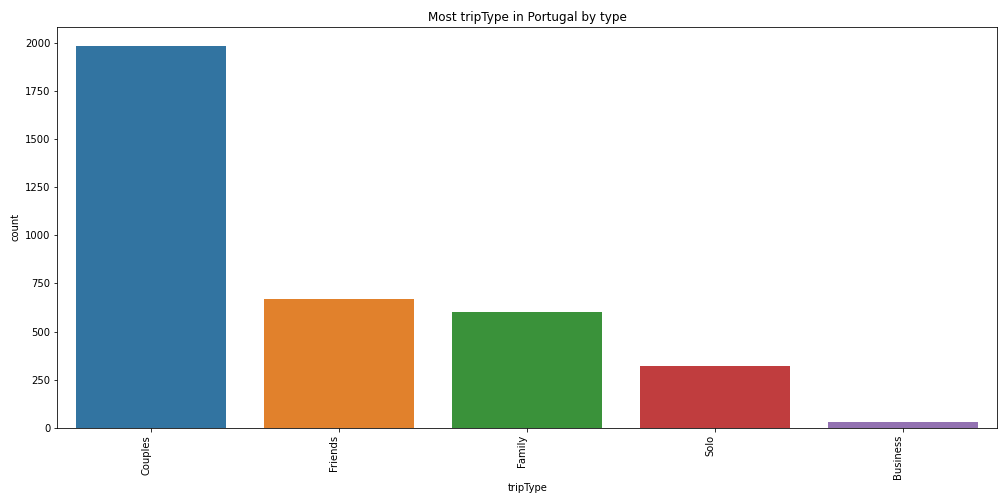

In [57]:
# Draw triptypes in Portugal in ascending value
plt.figure(figsize=(14,7))
ax = sns.countplot(x='tripType', data=portugal_two, order=pd.value_counts(portugal_two['tripType']).iloc[:20].index);
plt.title('Most tripType in Portugal by type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

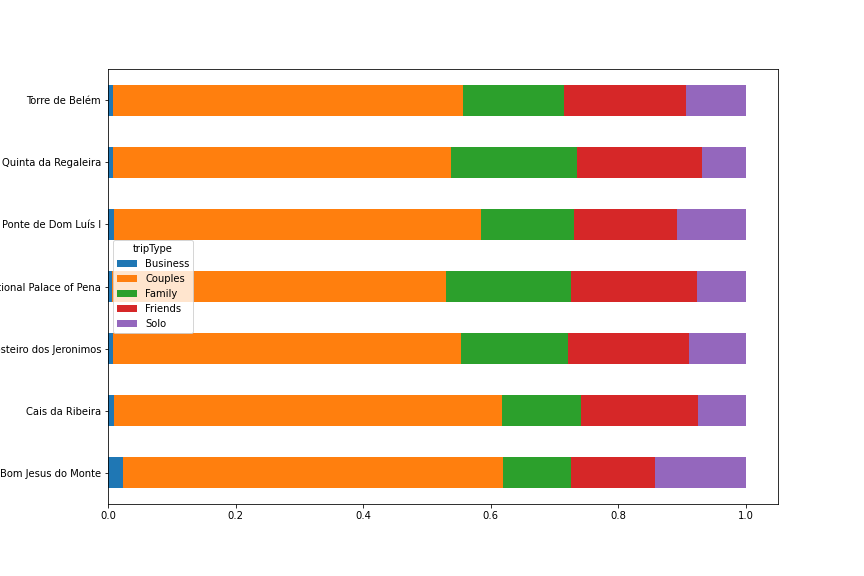

In [58]:
triptype_pt = pd.crosstab(portugal_two['Name'],portugal_two['tripType'],normalize='index')

triptype_pt = triptype_pt.div(triptype_pt.sum(1), axis=0)

# Draw
fig, ax = plt.subplots(figsize=(12,8))
g = triptype_pt.plot(kind='barh', stacked=True, ax=ax)

# clearly couples is the major representation of triptype across all attractions in Poprtugal

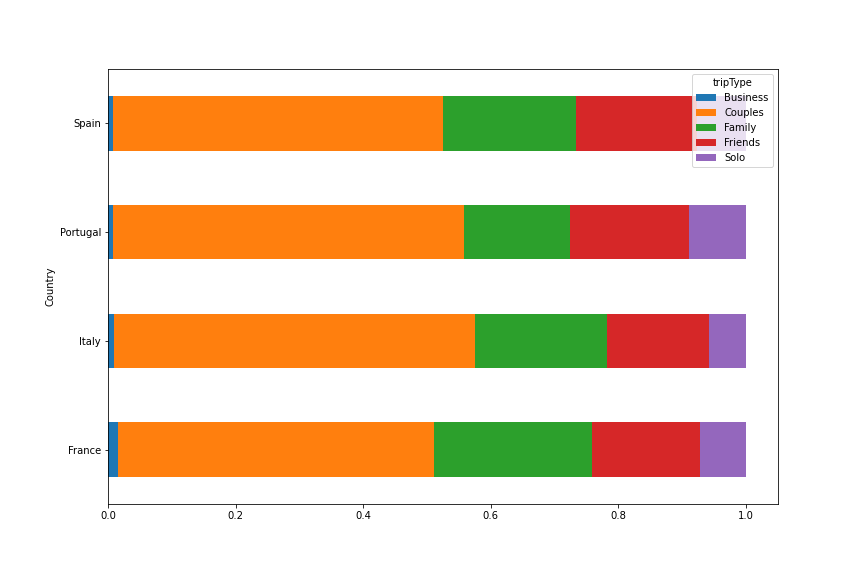

In [59]:
# triptypes proportion across main countries 

triptype_all = pd.crosstab(pr_it_es_fr['Country'],pr_it_es_fr['tripType'],normalize='index')

triptype_all = triptype_all.div(triptype_all.sum(1), axis=0)

# Draw
fig, ax = plt.subplots(figsize=(12,8))
g = triptype_all.plot(kind='barh', stacked=True, ax=ax)

# triptypes across main countries dont differ too much, maybe families are less representated in Portugal than in other countries

<AxesSubplot:xlabel='reviewVisited', ylabel='Density'>

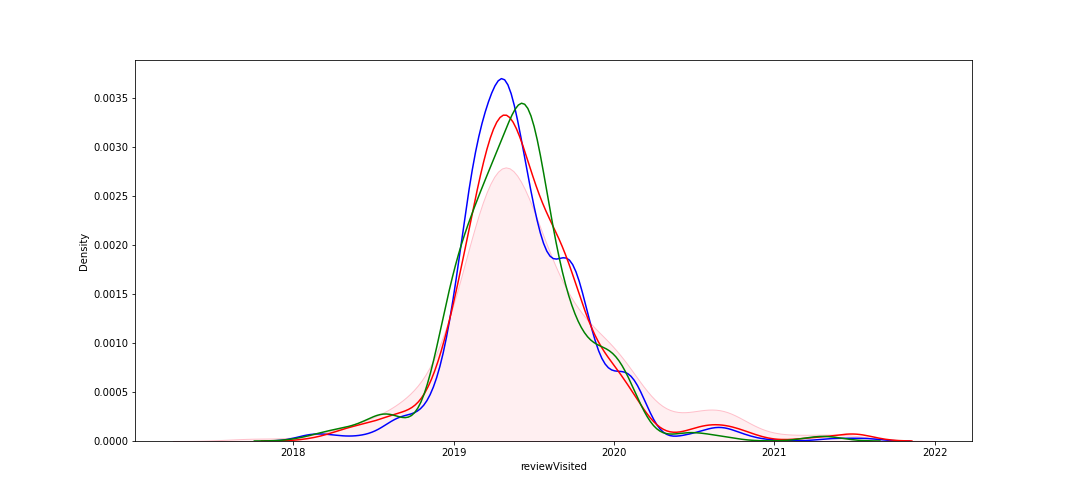

In [60]:
# density plot in Portugal based on different triptypes
fig, ax = plt.subplots(figsize=(15,7))


sns.kdeplot(portugal_two[portugal_two['tripType']=='Couples']['reviewVisited'], shade=False, color='blue')
sns.kdeplot(portugal_two[portugal_two['tripType']=='Friends']['reviewVisited'], shade=False, color='red')
sns.kdeplot(portugal_two[portugal_two['tripType']=='Family']['reviewVisited'], shade=False, color='green')
sns.kdeplot(portugal_two[portugal_two['tripType']=='Solo']['reviewVisited'], shade=True, color='pink')

# Shaded colour is trip type - solo --> proving, this has been the least hit triptype by the covid, yet also very much. However, it confirms assumption of which trip type has beeb affected the least.
# Covid clearly hasn't much impacted different triptypes, only solo traveling which makess sense

### DATA EXPLORATION - INSIGHT 3 - Portuguese as only tourisits (or mayority) of tourists in Portugal after Covid 

(array([17440., 17563., 17591., 17622., 17652., 17683., 17713., 17744.,
        17775., 17805., 17836., 17866., 17897., 17928., 17956., 17987.,
        18017., 18048., 18078., 18109., 18140., 18170., 18201., 18231.,
        18262., 18293., 18322., 18353., 18383., 18414., 18444., 18475.,
        18506., 18536., 18567., 18597., 18628., 18659., 18687., 18718.,
        18748., 18779., 18809., 18840.]),
 [Text(17440.0, 0, 'Oct17'),
  Text(17563.0, 0, 'Feb18'),
  Text(17591.0, 0, 'Mar18'),
  Text(17622.0, 0, 'Apr18'),
  Text(17652.0, 0, 'May18'),
  Text(17683.0, 0, 'June18'),
  Text(17713.0, 0, 'July18'),
  Text(17744.0, 0, 'Aug18'),
  Text(17775.0, 0, 'Sept18'),
  Text(17805.0, 0, 'Oct18'),
  Text(17836.0, 0, 'Nov18'),
  Text(17866.0, 0, 'Dec18'),
  Text(17897.0, 0, 'Jan19'),
  Text(17928.0, 0, 'Feb19'),
  Text(17956.0, 0, 'Mar19'),
  Text(17987.0, 0, 'Apr19'),
  Text(18017.0, 0, 'May19'),
  Text(18048.0, 0, 'June19'),
  Text(18078.0, 0, 'July19'),
  Text(18109.0, 0, 'Aug19'),
  Text(18140.

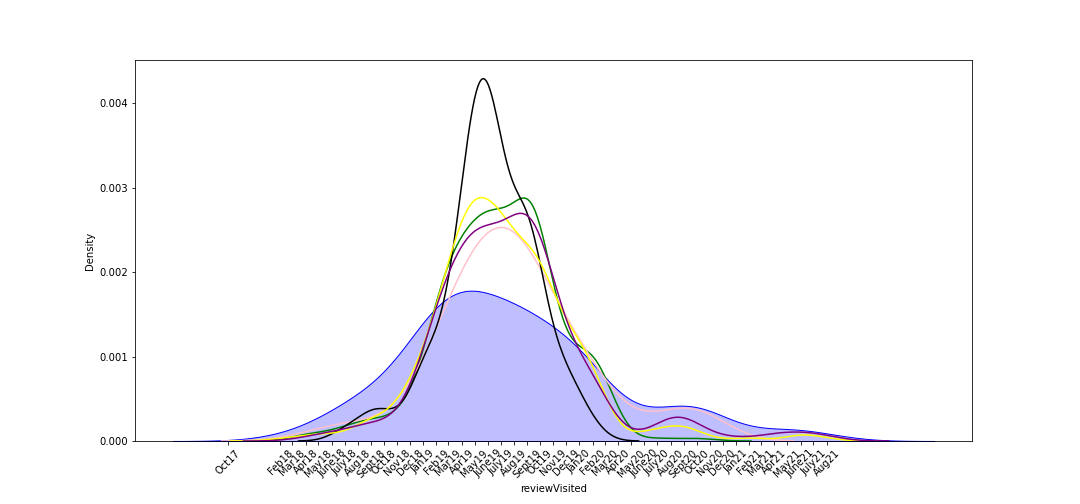

In [61]:
# density plot based on different updated_location (user location) in Portugal
fig, ax = plt.subplots(figsize=(15,7))

# sns.kdeplot(portugal_two[portugal_two['Updated_location']=='United States']['reviewVisited'], shade=False, color='yellow', x='reviewVisited')
# sns.kdeplot(portugal_two[portugal_two['Updated_location']=='United Kingdom']['reviewVisited'], shade=False, color='red', x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Updated_location']=='Canada']['reviewVisited'], shade=False, color='green', x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Updated_location']=='Portugal']['reviewVisited'], shade=True, color='blue',x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Updated_location']=='Spain']['reviewVisited'], shade=False, color='pink',x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Updated_location']=='Australia/New Zealand']['reviewVisited'], shade=False, color='black',x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Updated_location']=='Different country']['reviewVisited'], shade=False, color='yellow',x='reviewVisited')
sns.kdeplot(portugal_two[portugal_two['Updated_location']=='Missing location - NaN']['reviewVisited'], shade=False, color='purple',x='reviewVisited')

pos = [ '2017-10-01', '2018-02-01', '2018-03-01', '2018-04-01', 
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
      '2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01',
      '2019-10-01','2019-11-01','2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01'
      ,'2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01',
      '2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01']
  
lab = [ 'Oct17', 'Feb18', 'Mar18', 'Apr18', 'May18', 'June18', 
       'July18', 'Aug18', 'Sept18', 'Oct18', 'Nov18', 'Dec18', 'Jan19',
      'Feb19', 'Mar19', 'Apr19', 'May19', 'June19', 
       'July19', 'Aug19', 'Sept19', 'Oct19', 'Nov19', 'Dec19','Jan20','Feb20', 'Mar20', 'Apr20', 'May20', 'June20', 
       'July20', 'Aug20', 'Sept20', 'Oct20', 'Nov20', 'Dec20','Jan21','Feb21', 'Mar21', 'Apr21', 'May21', 'June21', 
       'July21', 'Aug21']
  
plt.xticks( pos, lab)
plt.xticks(rotation=45)

### DATA EXPLORATION - other observations

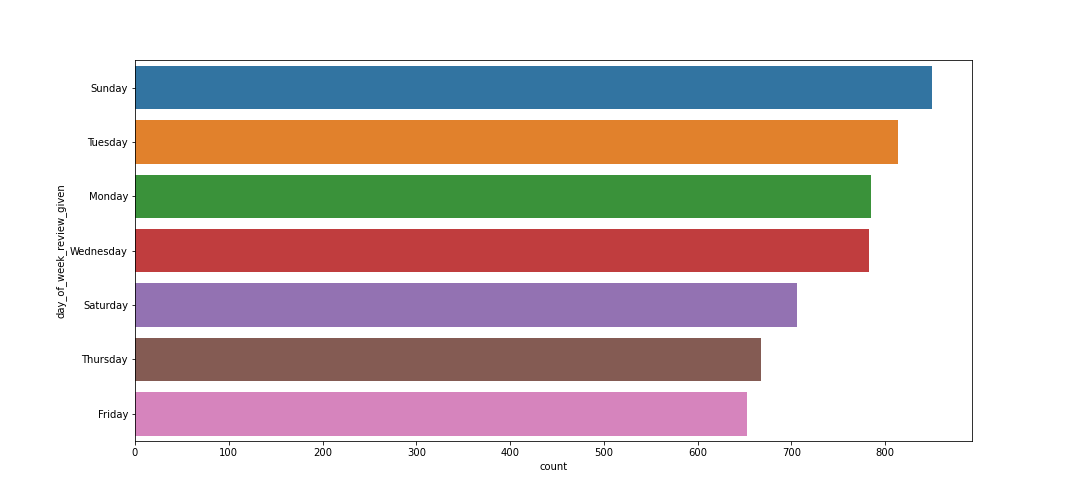

In [62]:
plt.figure(figsize=(15,7))
ax = sns.countplot(y='day_of_week_review_given', data=portugal_two, order=pd.value_counts(portugal_two['day_of_week_review_given']).iloc[:7].index);

# On sundays, people give most ratings but the difference between days is not so much different one from another. Lets have a look into different "ratings" habit - to see if we can find some patterns (like on friday, people tend to give better ratings because they feel better ahead of weekend)


In [63]:
# AVG rating in Portugal across days when rating is given

pt_crosstab_two = pd.crosstab(index=portugal_two['Country'],
            columns=portugal_two['day_of_week_review_given'],
            values=portugal_two['reviewRating'],
            aggfunc=np.mean)
pt_crosstab_two.style.background_gradient(axis=None, low=0.75, high=1.0)

day_of_week_review_given,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Country,,,,,,,
Portugal,4.401225,4.394904,4.432011,4.484706,4.425150,4.455774,4.450830


In [64]:

# AVG rating across days when rating is given, segmented by countries

countries_crosstab_two = pd.crosstab(index=pr_it_es_fr['Country'],
            columns=pr_it_es_fr['day_of_week_review_given'],
            values=pr_it_es_fr['reviewRating'],
            aggfunc=np.mean)
countries_crosstab_two.style.background_gradient(axis=None, low=0.75, high=1.0)

day_of_week_review_given,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Country,,,,,,,
France,4.459641,4.510476,4.445190,4.473445,4.427451,4.382906,4.458716
Italy,4.632184,4.632236,4.684524,4.659229,4.654777,4.655819,4.625626
Portugal,4.401225,4.394904,4.432011,4.484706,4.425150,4.455774,4.450830
Spain,4.600734,4.575082,4.617228,4.616027,4.580573,4.605664,4.623188


# Modeling

## Modeling - Selecting modeling technique

In [65]:
# finding out how many users have visitied at least 2 attractions in Portugal - in case there is a high number, we can run association rules
Portugal_two_visits = portugal_two[portugal_two['userName'].map(portugal_two['userName'].value_counts()) > 1]
Portugal_two_visits['userName'].nunique()

# 959 is great number, telling is there is at least 959 combinations of 2+ attractions in the dataset - this is statiscally significant for a try of a association rules!

959

we only will go with association rules, also RFM and similarity matrixes are done, however not used in the report and neither would be used for the final presentation to the stakeholders

## Association rules

In [66]:
portugal_associations = portugal_two[['Name', 'userName']]
portugal_associations

,Name,userName
29827,Torre de Belém,Barbs25@Barbs25
29828,Torre de Belém,WWH47@WWH47
29829,Torre de Belém,Runawayblond@runawayblond
29830,Torre de Belém,Darren H@DarrenHumphrey
29831,Torre de Belém,Kevin S@kevins684
...,...,...
91034,Bom Jesus do Monte,JAFL@Joao-Jafl
91035,Bom Jesus do Monte,Loveitta@Loveitta
91036,Bom Jesus do Monte,Kaytd60@Kaytd60
91037,Bom Jesus do Monte,BlueSkyTravell@BlueSkyTravell


In [67]:
# pivot table with only portuguese attractions! 
portugal_associations_pivot = pd.pivot_table(portugal_associations[['userName', 'Name']], index='userName', columns='Name', aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
portugal_associations_pivot

# pivot table with all user names --> 1 means the given user visited/gave rating to such place, if 0, it means that no

Name,Bom Jesus do Monte,Cais da Ribeira,Mosteiro dos Jeronimos,Park and National Palace of Pena,Ponte de Dom Luís I,Quinta da Regaleira,Torre de Belém
userName,,,,,,,
007JNR@007JNR,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0Garza@0Garza,0.0,0.0,1.0,1.0,0.0,0.0,1.0
101eggie@101eggie,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1104@1104,0.0,0.0,1.0,0.0,0.0,0.0,0.0
110Helen2014@110Helen2014,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
Екатерина Г@_C5261QZ,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Олександр П@X5628EZ_,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Симеон Б@FrequentFlier415125,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
portugal_frequent_namesets = apriori(portugal_associations_pivot, min_support=0.01, use_colnames=True)

In [69]:
# Generate the association rules - by support
rulesSupport = association_rules(portugal_frequent_namesets, metric="support", min_threshold=0.001)
rulesSupport.sort_values(by='support', ascending=False, inplace=True)
rulesSupport.head(5)

# only torre de belem together with mosteiro de jeronimos are present in 10% of occasions. Other combinations very low


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(Mosteiro dos Jeronimos),(Torre de Belém),0.277483,0.327774,0.102350,0.368852,1.125327,0.011399,1.065086
13,(Torre de Belém),(Mosteiro dos Jeronimos),0.327774,0.277483,0.102350,0.312259,1.125327,0.011399,1.050566
17,(Quinta da Regaleira),(Park and National Palace of Pena),0.147587,0.254486,0.064190,0.434932,1.709061,0.026631,1.319334
16,(Park and National Palace of Pena),(Quinta da Regaleira),0.254486,0.147587,0.064190,0.252234,1.709061,0.026631,1.139947
6,(Park and National Palace of Pena),(Mosteiro dos Jeronimos),0.254486,0.277483,0.043973,0.172790,0.622707,-0.026643,0.873439


In [70]:
# Generate the association rules - by confidence
rules_confidence = association_rules(portugal_frequent_namesets, metric="confidence", min_threshold=0.001)
rules_confidence.sort_values(by='confidence', ascending=False, inplace=True)
rules_confidence.head(5)

# now we get to see which once are those ones with higher confidence
# Interesting to see, antecedent support is really low (between 2-4%) and those match with either Torre de Belem or Mosteiro whose appeearance in dataset is much more frequent

# SO FAR no big insights unveiled, we have suspicion of having dataset that is not representative enoguh

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(Mosteiro dos Jeronimos, Quinta da Regaleira)",(Park and National Palace of Pena),0.020975,0.254486,0.016174,0.771084,3.029971,0.010836,3.256720
44,"(Quinta da Regaleira, Torre de Belém)",(Park and National Palace of Pena),0.022997,0.254486,0.015416,0.670330,2.634056,0.009563,2.261393
36,"(Mosteiro dos Jeronimos, Quinta da Regaleira)",(Torre de Belém),0.020975,0.327774,0.012636,0.602410,1.837884,0.005761,1.690751
31,"(Park and National Palace of Pena, Torre de Be...",(Mosteiro dos Jeronimos),0.043720,0.277483,0.025019,0.572254,2.062305,0.012887,1.689128
30,"(Park and National Palace of Pena, Mosteiro do...",(Torre de Belém),0.043973,0.327774,0.025019,0.568966,1.735849,0.010606,1.559565


In [71]:
# Generate the association rules - by lift
rules_lift = association_rules(portugal_frequent_namesets, metric="lift", min_threshold=0.001)
rules_lift.sort_values(by='lift', ascending=False, inplace=True)
rules_lift.head(5)

# not statiscally god enough either :(

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(Mosteiro dos Jeronimos, Quinta da Regaleira)",(Park and National Palace of Pena),0.020975,0.254486,0.016174,0.771084,3.029971,0.010836,3.256720
27,(Park and National Palace of Pena),"(Mosteiro dos Jeronimos, Quinta da Regaleira)",0.254486,0.020975,0.016174,0.063555,3.029971,0.010836,1.045469
45,(Park and National Palace of Pena),"(Quinta da Regaleira, Torre de Belém)",0.254486,0.022997,0.015416,0.060576,2.634056,0.009563,1.040002
44,"(Quinta da Regaleira, Torre de Belém)",(Park and National Palace of Pena),0.022997,0.254486,0.015416,0.670330,2.634056,0.009563,2.261393
24,"(Park and National Palace of Pena, Mosteiro do...",(Quinta da Regaleira),0.043973,0.147587,0.016174,0.367816,2.492206,0.009684,1.348363


In [72]:
# Add a column with the length and then displaying combinations that have appeared together in more than 5% of ocassions
portugal_frequent_namesets['length'] = portugal_frequent_namesets['itemsets'].apply(lambda x: len(x))
# Length=2 and Support>=0.05
portugal_frequent_namesets[(portugal_frequent_namesets['length'] == 2) & (portugal_frequent_namesets['support'] >= 0.05)]

# nothing breaking is unveiled, these combinations make sense as attractions are close one to another

,support,itemsets,length
13,0.10235,"(Mosteiro dos Jeronimos, Torre de Belém)",2
15,0.06419,"(Park and National Palace of Pena, Quinta da R...",2


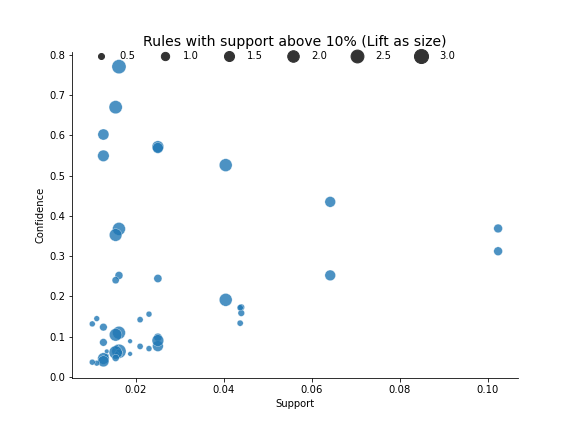

In [73]:
# Scatter plot of these rules

# Draw
fig, ax = plt.subplots(figsize=(8,6))
g = sns.scatterplot(data=rulesSupport, x="support", y="confidence", size="lift", sizes=(20, 200), alpha=0.8)

# Decoration
sns.despine()
plt.title("Rules with support above 10% (Lift as size)", fontsize=plots_Title_fontSize)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.rc('axes', labelsize=subPlots_label_fontSize)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper center', 
          ncol=6, bbox_to_anchor=(0.45, 1.03), frameon=False)

# clearly seen 2 patterns
# First is as already illustrated that only 2 combinations (of 2 attractions) have support (presence in the dataset) more than 5% - but they also have lower confidence
# there are some combinations with low support but high degree of confidence
# on the left bottom corner, there are many unrelated attractions combinations

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Park and National Palace of Pena'),
  Text(1, 0, 'Torre de Belém'),
  Text(2, 0, 'Mosteiro dos Jeronimos'),
  Text(3, 0, 'Ponte de Dom Luís I'),
  Text(4, 0, 'Quinta da Regaleira'),
  Text(5, 0, 'Cais da Ribeira'),
  Text(6, 0, 'Park and National Palace of Pena,Mosteiro dos Jeronimos'),
  Text(7, 0, 'Park and National Palace of Pena,Torre de Belém'),
  Text(8, 0, 'Mosteiro dos Jeronimos,Torre de Belém'),
  Text(9, 0, 'Mosteiro dos Jeronimos,Quinta da Regaleira'),
  Text(10, 0, 'Quinta da Regaleira,Torre de Belém'),
  Text(11, 0, 'Park and National Palace of Pena,Quinta da Regaleira'),
  Text(12, 0, 'Torre de Belém,Quinta da Regaleira')])

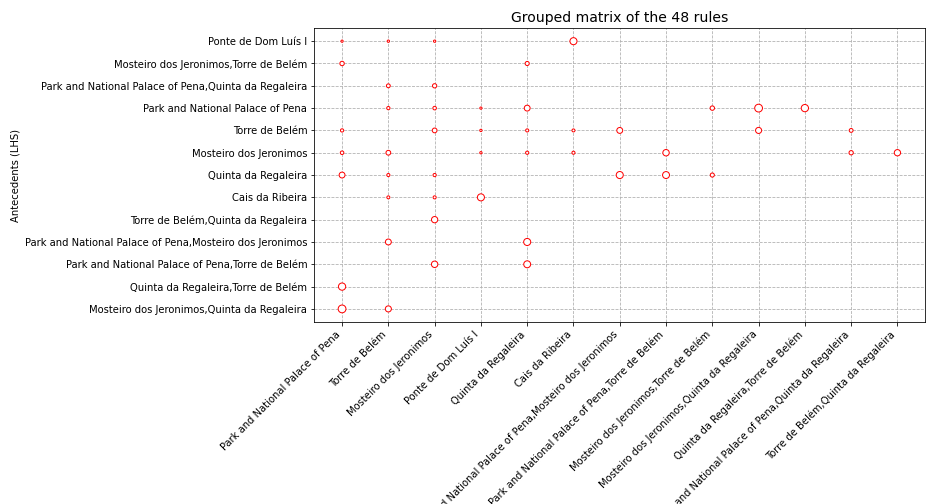

In [74]:
# Bubble plot of the rules based on confidence

# Replace frozen sets with strings
rules_confidence['antecedents_'] = rules_confidence['antecedents'].apply(lambda a: ','.join(list(a)))
rules_confidence['consequents_'] = rules_confidence['consequents'].apply(lambda a: ','.join(list(a)))

# Draw
fig, ax = plt.subplots(figsize=(13,7))
ax= plt.scatter(data=rules_confidence, x='consequents_', y='antecedents_', s = rules_confidence['lift']*20, edgecolors = "red", c = "white", zorder = 2)

# Decoration
nRules=rules_confidence.shape[0]
plt.title(f"Grouped matrix of the {nRules} rules", fontsize=plots_Title_fontSize)
plt.xlabel("Consequents (RHS)")
plt.ylabel("Antecedents (LHS)")
plt.grid(ls = "--", zorder = 1)
fig.autofmt_xdate()
plt.tight_layout()
plt.xticks(rotation=45)

IMPORTANT! FOLLOWING TWO MODELINGs DONT BELONG TO THE REPORT BUT ARE PRESENTED!

## RFM modeling

In [75]:
dateMax = portugal_two.reviewVisited.max()


In [76]:
# need to add column = totals of visits per each username 
portugal_rfm = portugal_two.copy()
portugal_rfm['user_visits_sum'] = portugal_rfm['userName'].map(portugal_rfm['userName'].value_counts())
portugal_rfm.head(5)

,localID,Name,Country,globalRating,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewFullText,Covid_time,visits_together_per_country,day_of_week_review_given,user_visits_sum,Updated_location
29827,MAG010,Torre de Belém,Portugal,4.0,Barbs25@Barbs25,"Staffordshire, UK",2273,Friends,2021-08-11,2021-07-01,3,Not blown away by it but nice enough to look a...,After Covid,5259,Wednesday,4,United Kingdom
29828,MAG010,Torre de Belém,Portugal,4.0,WWH47@WWH47,"Baton Rouge, LA",121,NaN,2021-08-02,2021-07-01,5,Well worth the visit in the Belem portion of t...,After Covid,5259,Monday,2,United States
29829,MAG010,Torre de Belém,Portugal,4.0,Runawayblond@runawayblond,"Chicago, IL",217,Solo,2021-07-26,2021-06-01,4,Really cool! Sadly it was closed to explore be...,After Covid,5259,Monday,1,United States
29830,MAG010,Torre de Belém,Portugal,4.0,Darren H@DarrenHumphrey,"Orlando, FL",298,NaN,2021-07-24,2021-06-01,5,What visit to Lisbon is complete without at le...,After Covid,5259,Saturday,2,United States
29831,MAG010,Torre de Belém,Portugal,4.0,Kevin S@kevins684,"Pontypridd, UK",4550,NaN,2021-07-23,2021-07-01,4,"A 16th century tower, ornately built so seemin...",After Covid,5259,Friday,4,United Kingdom


In [77]:
X = portugal_rfm.groupby(['userName']).agg(Recency=('reviewVisited', lambda date: (dateMax - date.max()).days),
                                   Frequency=('user_visits_sum', 'max'),
                                   Monetary=('userContributions', 'max')).fillna(0)

In [78]:
X.head(5)

,Recency,Frequency,Monetary
userName,,,
007JNR@007JNR,853.0,1,185
0Garza@0Garza,547.0,3,21
101eggie@101eggie,670.0,1,65
1104@1104,823.0,1,16
110Helen2014@110Helen2014,547.0,1,108


In [79]:
# Determinining RFM cutting points based on the quartiles (default for pandas "describe")
cols = ['Recency','Frequency','Monetary']
table = X[cols].describe()
table

# clear outliers on monetary max
# need to investigate recency

,Recency,Frequency,Monetary
count,3957.000000,3957.000000,3957.000000
mean,749.489765,1.329037,414.562042
std,166.968153,0.681548,3898.993614
min,0.000000,1.000000,1.000000
25%,670.000000,1.000000,23.000000
50%,762.000000,1.000000,73.000000
75%,853.000000,1.000000,214.000000
max,1277.000000,7.000000,165905.000000


In [80]:
# Calculate RMF scores

# Function
def RFMScore(x, col):
    if x <= X.quantile(0.25)[col]:
        return '1'
    elif x <= X.quantile(0.5)[col]:
        return '2'
    elif x <= X.quantile(0.75)[col]:
        return '3'
    else:
        return '4'

# Process
X['RScore'] = X['Recency'].apply(RFMScore, col='Recency')
X['FScore'] = X['Frequency'].apply(RFMScore, col='Frequency')
X['MScore'] = X['Monetary'].apply(RFMScore, col='Monetary')

In [81]:
X.head(60)

,Recency,Frequency,Monetary,RScore,FScore,MScore
userName,,,,,,
007JNR@007JNR,853.0,1,185,3,1,3
0Garza@0Garza,547.0,3,21,1,4,1
101eggie@101eggie,670.0,1,65,1,1,2
1104@1104,823.0,1,16,3,1,1
110Helen2014@110Helen2014,547.0,1,108,1,1,3
110randn@110randn,762.0,1,38,2,1,2
1234texas@1234texas,1004.0,1,2115,4,1,4
13playaazul@13playaazul,700.0,1,46,2,1,2
1527holiday1011@1527holiday1011,912.0,2,179,4,4,3


In [82]:
# Create a column with full RMF score and sort the results

# Transform to string
cols = ['RScore','FScore','MScore']
X[cols] = X[cols].astype(str)

# Concatenate
X['RFMScore'] = X['RScore'] + X['FScore'] + X['MScore']

# Sort
X = X.sort_values(by=['RFMScore'])
X.head(5)

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
Janine B@588janineb,609.0,1,17,1,1,1,111
Hugo Jepsen@hugojepsen,670.0,1,22,1,1,1,111
jilyn B@jilynb10,670.0,1,15,1,1,1,111
Hilary E@540hilarye,578.0,1,15,1,1,1,111
Henrik Thrue@henrikthrue,396.0,1,4,1,1,1,111


In [83]:
# Calculate statistics per RFM segment
RFMStats = X.reset_index().groupby(['RFMScore']).agg(NrUsers=('userName', lambda i: len(i.unique())),
                                                     avgRecency=('Recency', 'mean'),
                                                     avgFrequency=('Frequency', 'mean'),
                                                     avgMonetary=('Monetary', 'mean')).fillna(0)
RFMStats.head(30)

,NrUsers,avgRecency,avgFrequency,avgMonetary
RFMScore,,,,
111,304,548.256579,1.000000,10.276316
112,231,581.831169,1.000000,42.800866
113,194,566.376289,1.000000,126.680412
114,155,557.116129,1.000000,733.425806
141,39,591.538462,2.205128,13.410256
142,48,572.520833,2.145833,43.416667
143,77,562.844156,2.259740,132.597403
144,133,565.646617,2.511278,2915.781955
211,213,728.525822,1.000000,9.934272


In [84]:
X[X['RFMScore']=='144']

,Recency,Frequency,Monetary,RScore,FScore,MScore,RFMScore
userName,,,,,,,
JR Traveller@jr87traveller,365.0,2,786,1,4,4,144
nonamect@nonamect,639.0,2,250,1,4,4,144
borutk23@krogb23,426.0,3,417,1,4,4,144
Richy1708@Richy1708,639.0,2,471,1,4,4,144
howiet1971@howiet1971,547.0,4,1421,1,4,4,144
...,...,...,...,...,...,...,...
Murphy2k14@Murphy2k14,547.0,2,303,1,4,4,144
יוסי מ@K454TO_,639.0,3,314,1,4,4,144
badmintontim@badmintontim,639.0,3,4508,1,4,4,144


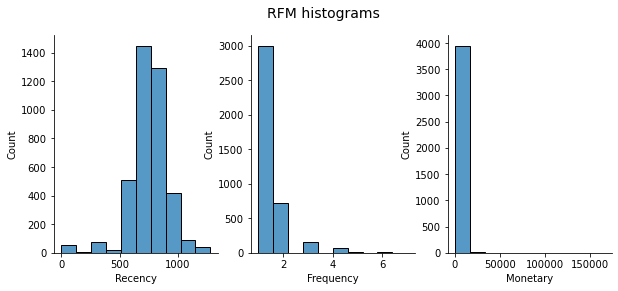

In [85]:
# Histogram of RFM
%matplotlib inline
cols = ['Recency','Frequency','Monetary']

# Draw
fig, ax = plt.subplots(1, 3, figsize=(10,4))
for var, subplot in zip(X[cols], ax.flatten()):
    g = sns.histplot(data=X,
                bins=10,
                 x=var,
                 ax=subplot,
                 kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("RFM histograms", fontsize=plots_Title_fontSize);

# clear to see that that modeling dataset should have been cleaned by the outliers (monetary for ex. which is user contributions)
# also distribution shows that majority of values are close to each other and so, the mean representation of each segment might not differ much, making the analysis 

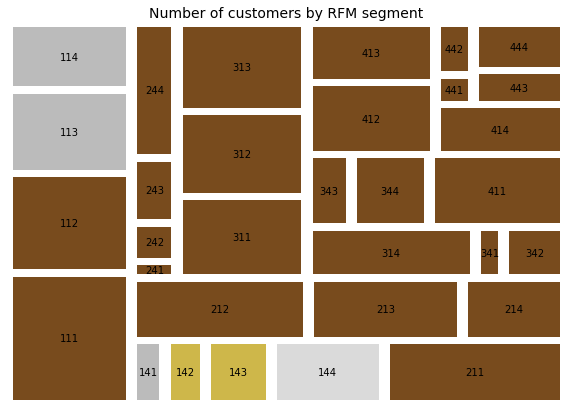

In [87]:
# Treemap with number of customers by segment

# Define colors for levels
def assignColor(rfm):
    if (rfm=='144'):
        hex='#D7D7D7'   # Platinium
    elif (rfm in ['142','143','133','134','124']):
        hex='#C9B037'   # Gold
    elif (rfm in ['141','131','132','122','123','113','114']):
        hex='#B4B4B4'   # Silver
    else:
        hex='#6A3805'   # Bronze
    return hex

color = [assignColor(x) for x in RFMStats.index]

# Draw
fig, ax = plt.subplots(figsize=(10,7))

# Plot
squarify.plot(sizes=RFMStats['NrUsers'], 
              label=RFMStats.index,
              color = color,
              alpha=.9,
              pad=True)                    

# Decoration
plt.title("Number of customers by RFM segment",fontsize=plots_Title_fontSize)
plt.axis('off')
plt.show()

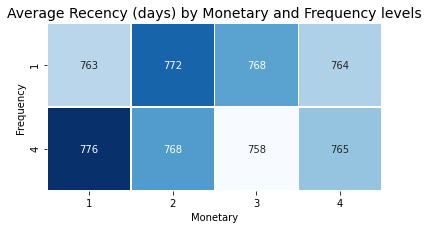

In [86]:
# RFM Heatmap

# Prepare data
tempDF = RFMStats
tempDF['Frequency'] = tempDF.index.str[1]
tempDF['Monetary'] = tempDF.index.str[2]
pt = pd.pivot_table(tempDF, values='avgRecency', 
                     index=['Frequency'], 
                     columns='Monetary')

# Draw
fig , ax = plt.subplots(figsize=(6, 8))
heatmap = sns.heatmap(pt,
                      square = True,
                      linewidths = .5,
                      cmap = 'Blues',
                      cbar=False,
                      fmt='.0f',
                      annot = True,
                      annot_kws = {'size': heatmaps_text_fontSize+2})

# Decoration
plt.title("Average Recency (days) by Monetary and Frequency levels", fontsize=plots_Title_fontSize)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## SIMILARITIES / DISIMILARITIES

In [88]:
portugal_two_pivot_table = pd.pivot_table(portugal_two[['userName', 'Name']], index='userName', columns='Name', aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)
portugal_two_pivot_table.shape

(3957, 7)

In [89]:
# customer similarity matrix
customer_customer_sim_matrix = pd.DataFrame(
    pairwise_distances(portugal_two_pivot_table,metric='cosine'),
    columns = portugal_two_pivot_table.index,
    index = portugal_two_pivot_table.index
)
customer_customer_sim_matrix = customer_customer_sim_matrix.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
customer_customer_sim_matrix

userName,007JNR@007JNR,0Garza@0Garza,101eggie@101eggie,1104@1104,110Helen2014@110Helen2014,110randn@110randn,1234texas@1234texas,13playaazul@13playaazul,1527holiday1011@1527holiday1011,157nk@157nk,...,zoeh198@zoeh198,zubenel57@zubenel57,zuni P@zunip,zylig@zylig,Ανδρόνικος Γκιουμές@T1025ZU_,Екатерина Г@_C5261QZ,Олександр П@X5628EZ_,Симеон Б@FrequentFlier415125,יוסי מ@K454TO_,桂子 大@_T2961PL
userName,,,,,,,,,,,,,,,,,,,,,
007JNR@007JNR,1.000000,0.577350,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.707107,0.00000,0.000000,1.000000
0Garza@0Garza,0.577350,1.000000,0.57735,0.577350,0.577350,0.0,0.00000,0.577350,0.408248,0.577350,...,0.408248,0.57735,0.816497,0.577350,0.00000,0.0,0.816497,0.57735,0.333333,0.577350
101eggie@101eggie,0.000000,0.577350,1.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.707107,0.000000,...,0.707107,1.00000,0.707107,0.000000,0.00000,0.0,0.000000,1.00000,0.577350,0.000000
1104@1104,0.000000,0.577350,0.00000,1.000000,1.000000,0.0,0.00000,1.000000,0.000000,1.000000,...,0.000000,0.00000,0.707107,1.000000,0.00000,0.0,0.707107,0.00000,0.000000,0.000000
110Helen2014@110Helen2014,0.000000,0.577350,0.00000,1.000000,1.000000,0.0,0.00000,1.000000,0.000000,1.000000,...,0.000000,0.00000,0.707107,1.000000,0.00000,0.0,0.707107,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Екатерина Г@_C5261QZ,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.707107,0.000000,...,0.707107,0.00000,0.000000,0.000000,0.00000,1.0,0.000000,0.00000,0.000000,0.000000
Олександр П@X5628EZ_,0.707107,0.816497,0.00000,0.707107,0.707107,0.0,0.00000,0.707107,0.000000,0.707107,...,0.000000,0.00000,0.500000,0.707107,0.00000,0.0,1.000000,0.00000,0.000000,0.707107
Симеон Б@FrequentFlier415125,0.000000,0.577350,1.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.707107,0.000000,...,0.707107,1.00000,0.707107,0.000000,0.00000,0.0,0.000000,1.00000,0.577350,0.000000


In [90]:
# similarity matrix across attractions
product_product_sim_matrix = pd.DataFrame(
    pairwise_distances(portugal_two_pivot_table.T,metric='cosine'),
    columns = portugal_two_pivot_table.columns,
    index = portugal_two_pivot_table.columns
    )
product_product_sim_matrix = product_product_sim_matrix.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
product_product_sim_matrix

# again, the biggest similarity is between Torre de Belem and Mosteiro
# other cna be Ponde de Dom Luis and Cais de Riberia
# Are here any marketing recommendations based on such analysis???

Name,Bom Jesus do Monte,Cais da Ribeira,Mosteiro dos Jeronimos,Park and National Palace of Pena,Ponte de Dom Luís I,Quinta da Regaleira,Torre de Belém
Name,,,,,,,
Bom Jesus do Monte,1.000000,0.084545,0.031402,0.046452,0.068976,0.028705,0.036116
Cais da Ribeira,0.084545,1.000000,0.069234,0.066873,0.317380,0.037973,0.070072
Mosteiro dos Jeronimos,0.031402,0.069234,1.000000,0.165475,0.064712,0.103650,0.339378
Park and National Palace of Pena,0.046452,0.066873,0.165475,1.000000,0.057764,0.331217,0.151378
Ponte de Dom Luís I,0.068976,0.317380,0.064712,0.057764,1.000000,0.037210,0.071065
Quinta da Regaleira,0.028705,0.037973,0.103650,0.331217,0.037210,1.000000,0.104560
Torre de Belém,0.036116,0.070072,0.339378,0.151378,0.071065,0.104560,1.000000


In [91]:
top_10_similar_items = list(
    product_product_sim_matrix
        .loc['Park and National Palace of Pena']
        .sort_values(ascending=False)
        .iloc[1:4]         # 1 to 11 instead of 0 to 10 because the first is the product itself
    .index
)
top_10_similar_items
# Based on similarity - once we pick one attraction, the top 3 most similar attractiosn can be spitted out - again, useful for some marketing activities?
# this method can be used for collective tickets to the attractions (BCN example with museums) maybe?

['Quinta da Regaleira', 'Mosteiro dos Jeronimos', 'Torre de Belém']